### Created July 13, 2025

In [1]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
def points_within_bounding_box(points, bbox):
    """
    Filters points within a bounding box.
    
    Args:
        points (list of tuples): List of (latitude, longitude) tuples.
        bbox (tuple): Bounding box as (min_lat, min_lon, max_lat, max_lon).
        
    Returns:
        list of tuples: Points within the bounding box.
    """
    min_lat, min_lon, max_lat, max_lon = bbox

    inside_points = [
        (lat, lon) for lat, lon in points
        if min_lat <= lat <= max_lat and min_lon <= lon <= max_lon
    ]
    # return [i for i in range(len(lat)) if (lat[i], lon[i]) in inside_points]
    return inside_points

In [3]:
def plot_wfm(ds, i, bin_start=0, bin_end=1024, ylim=None, ax=None):
    waveforms = ds.variables['pwr_waveform_20_ku'][:]  # Power waveforms for 20 Hz
    echo_scale_pwr = ds.variables['echo_scale_pwr_20_ku'][:]  # Scaling factor for power
    echo_scale_factor = ds.variables['echo_scale_factor_20_ku'][:]  # Scaling factor exponent
    latitudes = ds.variables['lat_20_ku'][:]  # Latitude (20 Hz)
    longitudes = ds.variables['lon_20_ku'][:]  # Longitude (20 Hz)
    time = ds.variables['time_20_ku'][:]  # Ti

    
# Apply scaling to convert waveforms to power in watts
# scaled_waveforms = waveforms * echo_scale_factor[:, None] * (2.0 ** echo_scale_pwr[:, None])
    scaled_waveform = waveforms * echo_scale_factor * (2.0 ** echo_scale_pwr)

# Convert the power in watts to dB
# scaled_waveforms_db = 10 * np.log10(scaled_waveforms)

# Normalize the waveform for each individual waveform
# scaled_waveforms_normalized = scaled_waveforms / np.max(scaled_waveforms, axis=1)[:, None]

# Plot a subset of waveforms along the track (e.g., first 50 measurements)
    # plt.figure(figsize=(12, 6))
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
# Plot the first 50 waveforms (you can modify this for a different range)
# num_waveforms_to_plot = 50
    ax.plot(scaled_waveform[i, bin_start:bin_end], color='red') #, label=f"Lat: {latitudes[min_index]:.4f}, Lon: {longitudes[min_index]:.4f}")
    
    # plt.title("CryoSat-2 Radar Waveforms (Power) Along Track")
    ax.set_title(time[i].values)
    ax.set_xlabel("Range Gate")
    ticks = np.arange(bin_start, bin_end+1, 20)  # from 270 to 450 with step 10
    # custom_labels = list(range(bin_start, bin_end, int((bin_end - bin_start) / (len(scaled_waveform[i, bin_start:bin_end]) - 1))))
    ax.axvline(300-bin_start, color='k', ls='--', lw=1, alpha=0.7, zorder=0)
# Replace x-ticks (1 to 10) with 270 to 450 labels
    ax.set_xticks(ticks=ticks-bin_start, labels=ticks)
    ax.set_ylabel("Power (Watts)")
    if ylim==None:
        ylim = scaled_waveform.max()*1.1
    ax.set_ylim(0, ylim)
    ax.grid(alpha=0.7, zorder=0)      
    plt.tight_layout()
    # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))  # Place legend outside the plot
    # plt.show()
    return ax


In [4]:
def plot_wfm_one(ds, bin_start=0, bin_end=1024, ylim=None, ax=None):
    waveforms = ds.variables['pwr_waveform_20_ku'][:]  # Power waveforms for 20 Hz
    echo_scale_pwr = ds.variables['echo_scale_pwr_20_ku'][:]  # Scaling factor for power
    echo_scale_factor = ds.variables['echo_scale_factor_20_ku'][:]  # Scaling factor exponent
    latitudes = ds.variables['lat_20_ku'][:]  # Latitude (20 Hz)
    longitudes = ds.variables['lon_20_ku'][:]  # Longitude (20 Hz)
    time = ds.variables['time_20_ku'][:]  # Ti

    scaled_waveform = waveforms * echo_scale_factor * (2.0 ** echo_scale_pwr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
# Plot the first 50 waveforms (you can modify this for a different range)
# num_waveforms_to_plot = 50
    n_to_plot = len(ds.rec_count_20_ku)
    print(n_to_plot)
# Generate a colormap with n_lines colors
# Use new-style colormap access
    cmap = plt.colormaps['viridis']  # or matplotlib.colormaps.get_cmap('viridis')
    
    # Create a ScalarMappable with a normalized range
    norm = mcolors.Normalize(vmin=0, vmax=n_to_plot - 1)
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    
      
    # ylim = 1.5e-12#10e-13
    for i in range(n_to_plot):
        # j = n_to_plot - i - 1
        # # fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
        # plot_wfm(ds, i, bin_start=270, bin_end=450, ylim = ylim, ax=axes[0])
        # plot_wfm(ds2_bbox, j, bin_start=230, bin_end=410, ylim = ylim, ax=axes[1])
        
        ax.plot(scaled_waveform[i, bin_start:bin_end], color=cmap(norm(i))) #, label=f"Lat: {latitudes[min_index]:.4f}, Lon: {longitudes[min_index]:.4f}")

        print(str(time[i].values))
        
    # ax.set_title(time[i].values)
    ax.set_title(str(time[i].values)[:10])
    ax.set_xlabel("Range Gate")
    ticks = np.arange(bin_start, bin_end+1, 20)  # from 270 to 450 with step 10
    # custom_labels = list(range(bin_start, bin_end, int((bin_end - bin_start) / (len(scaled_waveform[i, bin_start:bin_end]) - 1))))
    ax.axvline(300-bin_start, color='k', ls='--', lw=1, alpha=0.7, zorder=0)
# Replace x-ticks (1 to 10) with 270 to 450 labels
    ax.set_xticks(ticks=ticks-bin_start, labels=ticks)
    ax.set_ylabel("Power (Watts)")
    if ylim==None:
        ylim = scaled_waveform.max()*1.1
# Optional: add colorbar showing the line indices
    cbar = plt.colorbar(sm, ax=ax, ticks=range(n_to_plot))
    cbar.set_ticklabels(time.values)#)
    # cbar.set_label('Index')  
    
    ax.set_ylim(0, ylim)
    ax.grid(alpha=0.7, zorder=0)      
    plt.tight_layout()
        # plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.0))  # Place legend outside the plot
    # plt.show()
    return ax


In [5]:
def plot_wfm_mean(ds, bin_start=0, bin_end=1024, ylim=None, ax=None):
    waveforms = ds.variables['pwr_waveform_20_ku'][:]  # Power waveforms for 20 Hz
    echo_scale_pwr = ds.variables['echo_scale_pwr_20_ku'][:]  # Scaling factor for power
    echo_scale_factor = ds.variables['echo_scale_factor_20_ku'][:]  # Scaling factor exponent
    latitudes = ds.variables['lat_20_ku'][:]  # Latitude (20 Hz)
    longitudes = ds.variables['lon_20_ku'][:]  # Longitude (20 Hz)
    time = ds.variables['time_20_ku'][:]  # Ti

    scaled_waveform = waveforms * echo_scale_factor * (2.0 ** echo_scale_pwr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
# Plot the first 50 waveforms (you can modify this for a different range)
# num_waveforms_to_plot = 50
    n_to_plot = len(ds.rec_count_20_ku)
    
    # Calculate mean and std
    mean_waveform = np.mean(scaled_waveform, axis=0)
    std_waveform = np.std(scaled_waveform, axis=0)

    # Create axis if none provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))

    # Plot
    bins = np.arange(bin_start, bin_end)
    ax.plot(bins, mean_waveform[bin_start:bin_end], label='Mean waveform', color='red', lw=2)
    ax.fill_between(bins, mean_waveform[bin_start:bin_end] - std_waveform[bin_start:bin_end],
                    mean_waveform[bin_start:bin_end] + std_waveform[bin_start:bin_end],
                    color='gray', alpha=0.3, label='±1 Std Dev')

    ax.set_xlabel("Range Gate")
    ax.set_ylabel("Power (Watts)")
    # ax.set_title("Mean and Std Dev of Scaled Waveforms")
    ax.grid(True)
    if ylim==None:
        ylim = mean_waveform[bin_start:bin_end].max()*1.9
    ax.set_ylim(0, ylim)
    ax.legend()

    return ax


In [6]:
choice = input("Enter 'thin' or 'thick': ").strip().lower()

if choice == "thin":
    # --- Thin code block ---
    print("Running thin code...")
    # THIN CASE
    # Load both subsetted datasets
    ds1 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240411T105309_20240411T105755_E001.nc")
    ds2 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240522T191214_20240522T191615_E001.nc")
    
    # Extract lat, lon, and time
    lat1, lon1, time1 = ds1["lat_20_ku"].values, ds1["lon_20_ku"].values, ds1["time_20_ku"].values
    lat2, lon2, time2 = ds2["lat_20_ku"].values, ds2["lon_20_ku"].values, ds2["time_20_ku"].values
    
    # Round lat/lon for intersection tolerance (adjust decimal as needed)
    decimals = 99
    coords1 = set(zip(lat1, lon1))
    coords2 = set(zip(lat2, lon2))
    
    bbox = (80.237, -87.015, 80.299,  -86.794)
    
    inside1 = points_within_bounding_box(coords1, bbox)
    inside2 = points_within_bounding_box(coords2, bbox)
    
    # Get corresponding time values
    
    ds1.close()
    ds2.close
    
    ### Jul 13, 2025
    # THIN
    ### Dropping by rec_count_20_ku, check that lat/lon start/end are correct
    ds1_bbox_tmp = ds1.where(ds1.rec_count_20_ku>=ds1.rec_count_20_ku.values.min()+33, drop=True) # thick case 20240406 start 1 80.148 -97.050 end 32 80.066 -97.157
    ds1_bbox = ds1_bbox_tmp.where(ds1_bbox_tmp.rec_count_20_ku<=ds1_bbox_tmp.rec_count_20_ku.values.min()+57-34, drop=True) # thick case 20240406 start 1 80.148 -97.050 end 32 80.066 -97.157
    # ds1_bbox['lon_20_ku']
    
    # ds2.where(ds2.rec_count_20_ku<=523, drop=True)
    ds2_tmp = ds2.where(ds2.rec_count_20_ku<=ds2.rec_count_20_ku.values.min()+59, drop=True) # thick case 20240519 start 93 80.052 -97.464 end 126 80.139 -97.577
    ds2_bbox = ds2_tmp.where(ds2_tmp.rec_count_20_ku>=ds2.rec_count_20_ku.values.min()+36, drop=True) 
    print('done - thin')

elif choice == "thick":
    # --- Thick code block ---
    print("Running thick code...")
    ### Added July 13, 2025
    # THICK CASE
    
    # Load both subsetted datasets
    ds1 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240406T114803_20240406T115232_E001.nc")
    ds2 = xr.open_dataset("subset_CS_OFFL_SIR_SIN_1B_20240519T200408_20240519T200815_E001.nc")
    
    # Extract lat, lon, and time
    lat1, lon1, time1 = ds1["lat_20_ku"].values, ds1["lon_20_ku"].values, ds1["time_20_ku"].values
    lat2, lon2, time2 = ds2["lat_20_ku"].values, ds2["lon_20_ku"].values, ds2["time_20_ku"].values
    
    # Round lat/lon for intersection tolerance (adjust decimal as needed)
    decimals = 99
    coords1 = set(zip(lat1, lon1))
    coords2 = set(zip(lat2, lon2))
    
    bbox = (80.052, -97.577, 80.148,  -97.050)
    
    inside1 = points_within_bounding_box(coords1, bbox)
    inside2 = points_within_bounding_box(coords2, bbox)
    
    # Get corresponding time values
    
    ds1.close()
    ds2.close()
    
    ### Jul 13, 2025
    # THICK
    ### Dropping by rec_count_20_ku, check that lat/lon start/end are correct
    ds1_bbox = ds1.where(ds1.rec_count_20_ku<=524, drop=True) # thick case 20240406 start 1 80.148 -97.050 end 32 80.066 -97.157
    
    # ds2.where(ds2.rec_count_20_ku<=523, drop=True)
    ds2_tmp = ds2.where(ds2.rec_count_20_ku<=ds2.rec_count_20_ku.values.min()+125, drop=True) # thick case 20240519 start 93 80.052 -97.464 end 126 80.139 -97.577
    ds2_bbox = ds2_tmp.where(ds2_tmp.rec_count_20_ku>=ds2.rec_count_20_ku.values.min()+92, drop=True) 

    print('done - thick')
else:
    print("Invalid input. Please enter 'thin' or 'thick'.")


Enter 'thin' or 'thick':  thin


Running thin code...
done - thin


In [27]:
# points_within_bounding_box(coords1, bbox)
# coords1
# time1
# inside1
# ds1["time_20_ku"].where(ds1.lat_20_ku==[inside1[i][0] for i in range(len(inside1))])
ds1['rec_count_20_ku'].values
# ds1["time_20_ku"].where(ds1.rec_count_20_ku==492.)#[inside1[i][0] for i in range(len(inside1))])
# ds1['lat_20_ku'].where(ds1.rec_count_20_ku>=491)# & ds1.rec_count_20_ku<=523)


array([1074., 1075., 1076., 1077., 1078., 1079., 1080., 1081., 1082.,
       1083., 1084., 1085., 1086., 1087., 1088., 1089., 1090., 1091.,
       1092., 1093., 1094., 1095., 1096., 1097., 1098., 1099., 1100.,
       1101., 1102., 1103., 1104., 1105., 1106., 1107., 1108., 1109.,
       1110., 1111., 1112., 1113., 1114., 1115., 1116., 1117., 1118.,
       1119., 1120., 1121., 1122., 1123., 1124., 1125., 1126., 1127.,
       1128., 1129., 1130., 1131., 1132., 1133., 1134., 1135., 1136.,
       1137., 1138., 1139., 1140., 1141., 1142., 1143., 1144., 1145.,
       1146., 1147., 1148., 1149., 1150., 1151., 1152., 1153., 1154.,
       1155., 1156., 1157., 1158., 1159., 1160., 1161., 1162., 1163.,
       1164., 1165., 1166., 1167.])

In [26]:
ds1_bbox.info()
# ds1_bbox['lat_20_ku']
# ds1_bbox['lon_20_ku']
# ds2_bbox['lat_20_ku']


xarray.Dataset {
dimensions:
	time_20_ku = 24 ;
	time_plrm_01_ku = 317 ;
	time_plrm_20_ku = 5751 ;
	space_3d = 3 ;
	ns_20_ku = 1024 ;
	ns_plrm_01_ku = 512 ;
	ns_plrm_20_ku = 512 ;
	nlooks_ku = 60 ;
	time_cor_01 = 318 ;

variables:
	float64 agc_ch1_20_ku(time_20_ku) ;
		agc_ch1_20_ku:comment = Calibrated AGC gain applied on Rx channel 1. This is the sum of AGC stages 1 and 2 plus the corresponding AGC calibration corrections. ;
		agc_ch1_20_ku:long_name = AGC gain applied on rx channel 1. Gain calibration corrections are applied ;
		agc_ch1_20_ku:units = dB ;
	float64 agc_ch2_20_ku(time_20_ku) ;
		agc_ch2_20_ku:comment = Calibrated AGC gain applied on Rx channel 2. This is the sum of AGC stages 1 and 2 plus the corresponding AGC calibration corrections. ;
		agc_ch2_20_ku:long_name = AGC gain applied on rx channel 2. Gain calibration corrections are applied ;
		agc_ch2_20_ku:units = dB ;
	float64 alt_20_ku(time_20_ku) ;
		alt_20_ku:comment = Altitude of the Satellite CoM above the refere

<Axes: xlabel='Range Gate', ylabel='Power (Watts)'>

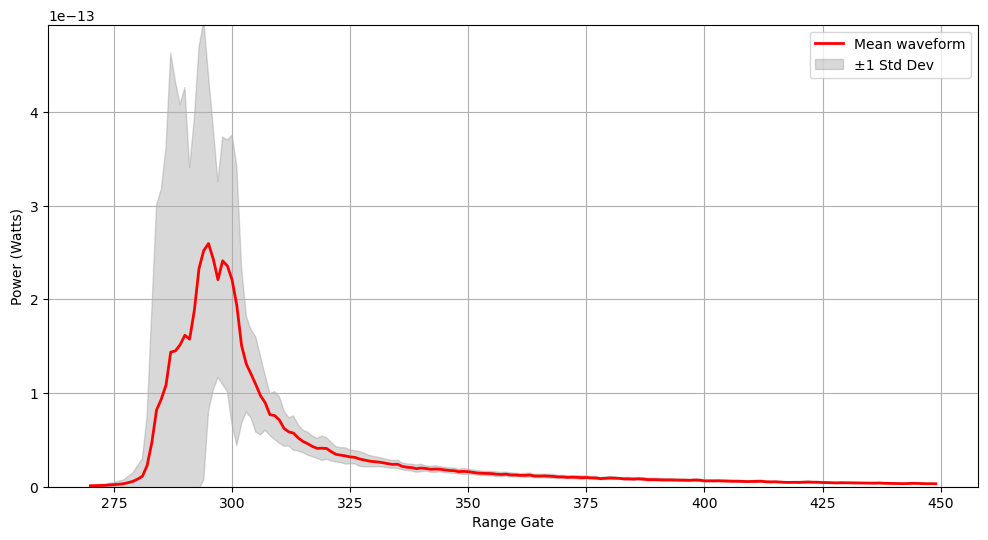

In [7]:
plot_wfm_mean(ds1_bbox, bin_start=270, bin_end=450)


24
2024-04-11T10:54:35.451149952
2024-04-11T10:54:35.496296064
2024-04-11T10:54:35.541442048
2024-04-11T10:54:35.586587008
2024-04-11T10:54:35.631732992
2024-04-11T10:54:35.676879104
2024-04-11T10:54:35.722023936
2024-04-11T10:54:35.767169024
2024-04-11T10:54:35.812315008
2024-04-11T10:54:35.857460992
2024-04-11T10:54:35.902605952
2024-04-11T10:54:35.947751040
2024-04-11T10:54:35.992896000
2024-04-11T10:54:36.038040960
2024-04-11T10:54:36.083186048
2024-04-11T10:54:36.128331008
2024-04-11T10:54:36.173475968
2024-04-11T10:54:36.218621056
2024-04-11T10:54:36.263766016
2024-04-11T10:54:36.308910976
2024-04-11T10:54:36.354056960
2024-04-11T10:54:36.399202048
2024-04-11T10:54:36.444347008
2024-04-11T10:54:36.489492096


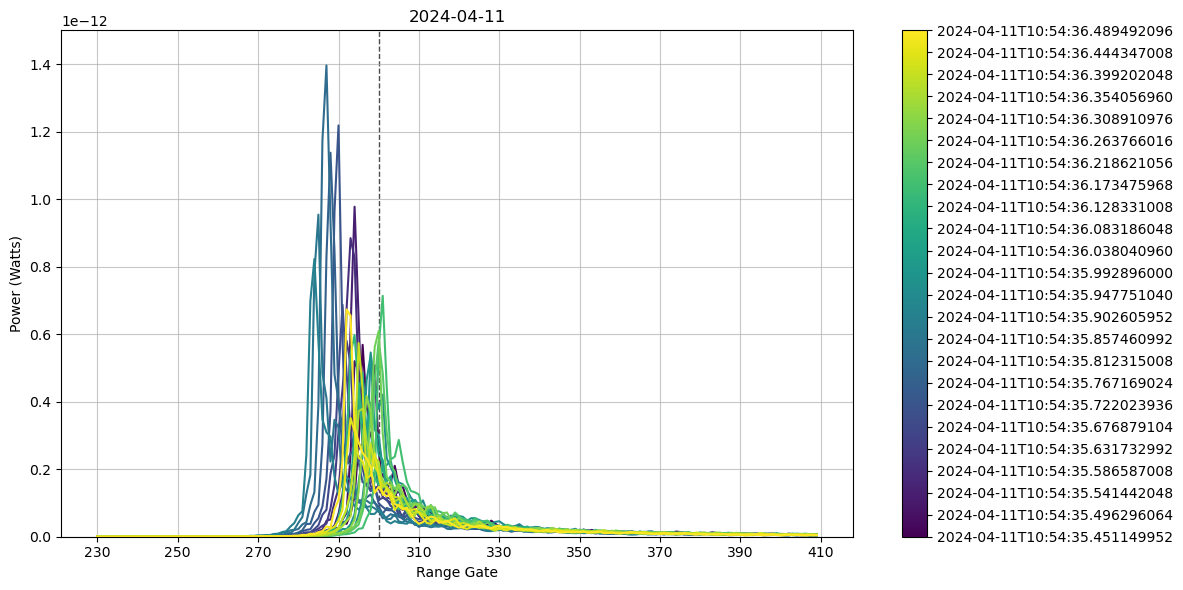

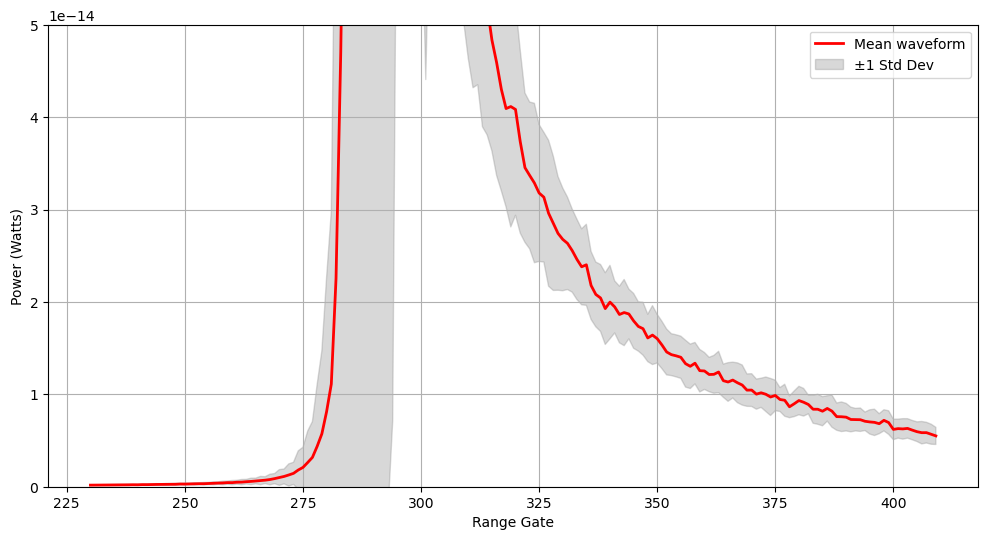

In [29]:
plot_wfm_one(ds1_bbox, bin_start=230, bin_end=410, ylim=1.5e-12)
plt.savefig('thick_20240406_ylim.png')

plot_wfm_mean(ds1_bbox, bin_start=230, bin_end=410, ylim=5e-14)
plt.savefig('thick_20240406_mean.png')

# plt.savefig('thick_20240406.png')
# plt.savefig('thin_20240411.png')
# plt.savefig('thin_20240411_ylim.png')

24
2024-04-11T10:54:35.451149952
2024-04-11T10:54:35.496296064
2024-04-11T10:54:35.541442048
2024-04-11T10:54:35.586587008
2024-04-11T10:54:35.631732992
2024-04-11T10:54:35.676879104
2024-04-11T10:54:35.722023936
2024-04-11T10:54:35.767169024
2024-04-11T10:54:35.812315008
2024-04-11T10:54:35.857460992
2024-04-11T10:54:35.902605952
2024-04-11T10:54:35.947751040
2024-04-11T10:54:35.992896000
2024-04-11T10:54:36.038040960
2024-04-11T10:54:36.083186048
2024-04-11T10:54:36.128331008
2024-04-11T10:54:36.173475968
2024-04-11T10:54:36.218621056
2024-04-11T10:54:36.263766016
2024-04-11T10:54:36.308910976
2024-04-11T10:54:36.354056960
2024-04-11T10:54:36.399202048
2024-04-11T10:54:36.444347008
2024-04-11T10:54:36.489492096


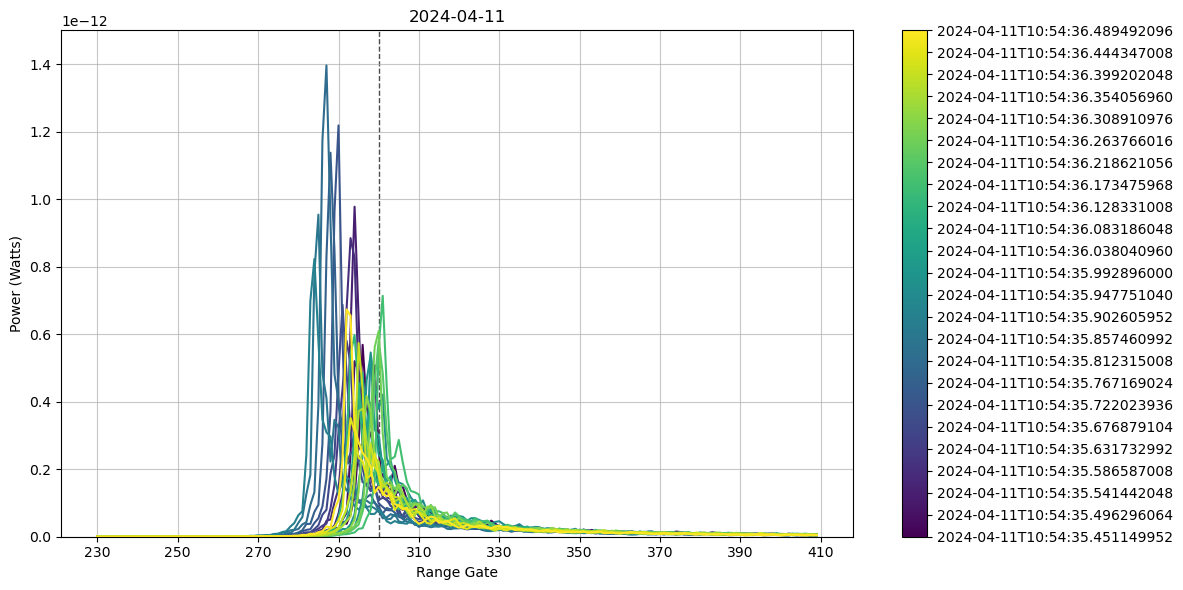

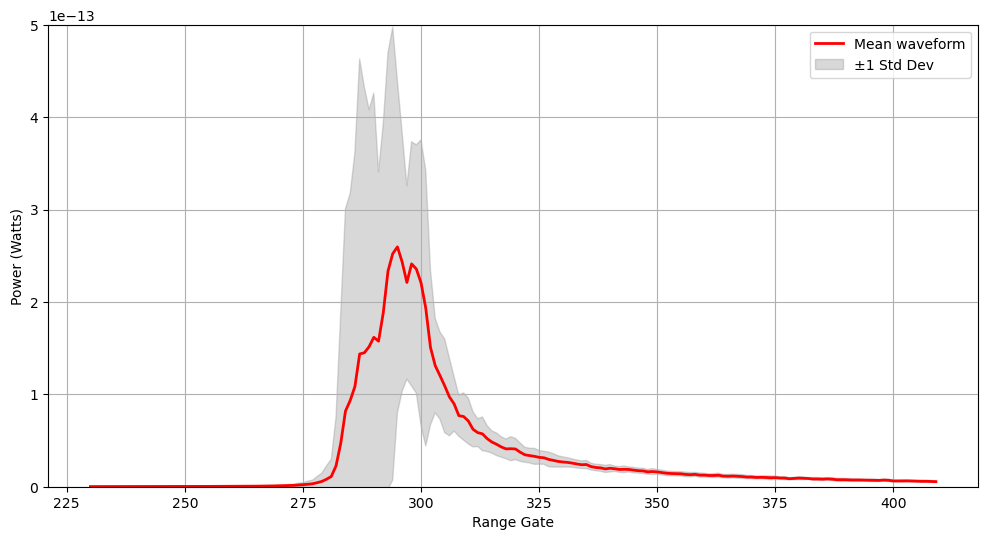

In [30]:
# plot_wfm_one(ds1_bbox, bin_start=230, bin_end=410)
plot_wfm_one(ds1_bbox, bin_start=230, bin_end=410, ylim=1.5e-12)
# plt.savefig('thick_20240406.png')
# plt.savefig('thick_20240406_ylim.png')
# plt.savefig('thin_20240411.png')
plt.savefig('thin_20240411_ylim.png')

plot_wfm_mean(ds1_bbox, bin_start=230, bin_end=410, ylim=5e-13)
plt.savefig('thin_20240411_mean.png')

34
2024-05-19T20:08:41.584781056
2024-05-19T20:08:41.629933056
2024-05-19T20:08:41.675084928
2024-05-19T20:08:41.720237056
2024-05-19T20:08:41.765388928
2024-05-19T20:08:41.810541056
2024-05-19T20:08:41.855692928
2024-05-19T20:08:41.900845056
2024-05-19T20:08:41.945997056
2024-05-19T20:08:41.991148928
2024-05-19T20:08:42.036301056
2024-05-19T20:08:42.081452928
2024-05-19T20:08:42.126605056
2024-05-19T20:08:42.171756928
2024-05-19T20:08:42.216909056
2024-05-19T20:08:42.262061952
2024-05-19T20:08:42.307214080
2024-05-19T20:08:42.352365952
2024-05-19T20:08:42.397518080
2024-05-19T20:08:42.442669952
2024-05-19T20:08:42.487822080
2024-05-19T20:08:42.532973952
2024-05-19T20:08:42.578125952
2024-05-19T20:08:42.623278080
2024-05-19T20:08:42.668429952
2024-05-19T20:08:42.713582976
2024-05-19T20:08:42.758736000
2024-05-19T20:08:42.803888000
2024-05-19T20:08:42.849040000
2024-05-19T20:08:42.894192000
2024-05-19T20:08:42.939344000
2024-05-19T20:08:42.984496000
2024-05-19T20:08:43.029648000
2024-05

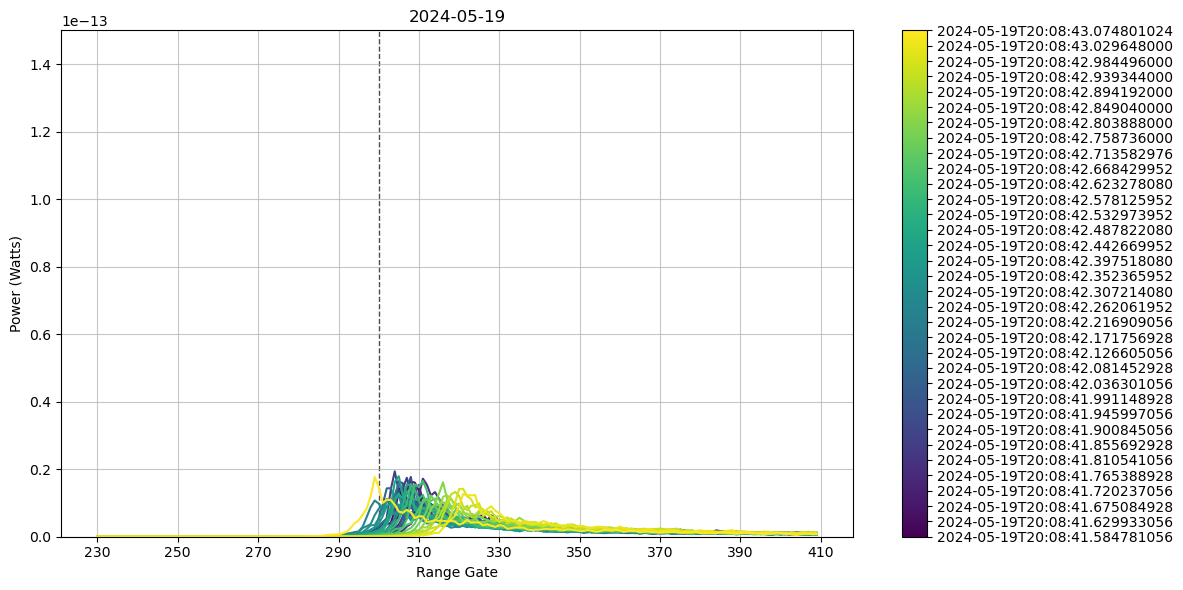

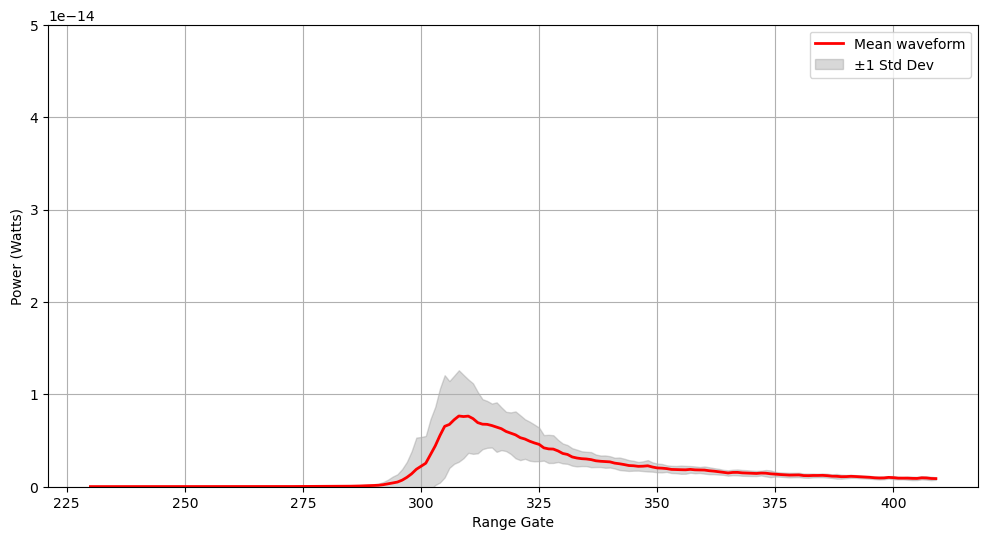

In [25]:
# plot_wfm_one(ds2_bbox, bin_start=230, bin_end=410)
plot_wfm_one(ds2_bbox, bin_start=230, bin_end=410, ylim=1.5e-13)
# plt.savefig('thick_20240519.png')
plt.savefig('thick_20240519_ylim.png')
# plt.savefig('thin_20240522.png')
# plt.savefig('thin_20240522_ylim.png')

plot_wfm_mean(ds2_bbox, bin_start=230, bin_end=410, ylim=5e-14)
plt.savefig('thick_20240519_mean.png')

24
2024-05-22T19:16:14.800227968
2024-05-22T19:16:14.845404032
2024-05-22T19:16:14.890583936
2024-05-22T19:16:14.935764992
2024-05-22T19:16:14.980945920
2024-05-22T19:16:15.026128000
2024-05-22T19:16:15.071308928
2024-05-22T19:16:15.116491008
2024-05-22T19:16:15.161675008
2024-05-22T19:16:15.206864000
2024-05-22T19:16:15.252055040
2024-05-22T19:16:15.297248000
2024-05-22T19:16:15.342440960
2024-05-22T19:16:15.387634944
2024-05-22T19:16:15.432829056
2024-05-22T19:16:15.478024064
2024-05-22T19:16:15.523218944
2024-05-22T19:16:15.568413952
2024-05-22T19:16:15.613608960
2024-05-22T19:16:15.658804096
2024-05-22T19:16:15.703999104
2024-05-22T19:16:15.749193984
2024-05-22T19:16:15.794388992
2024-05-22T19:16:15.839584000


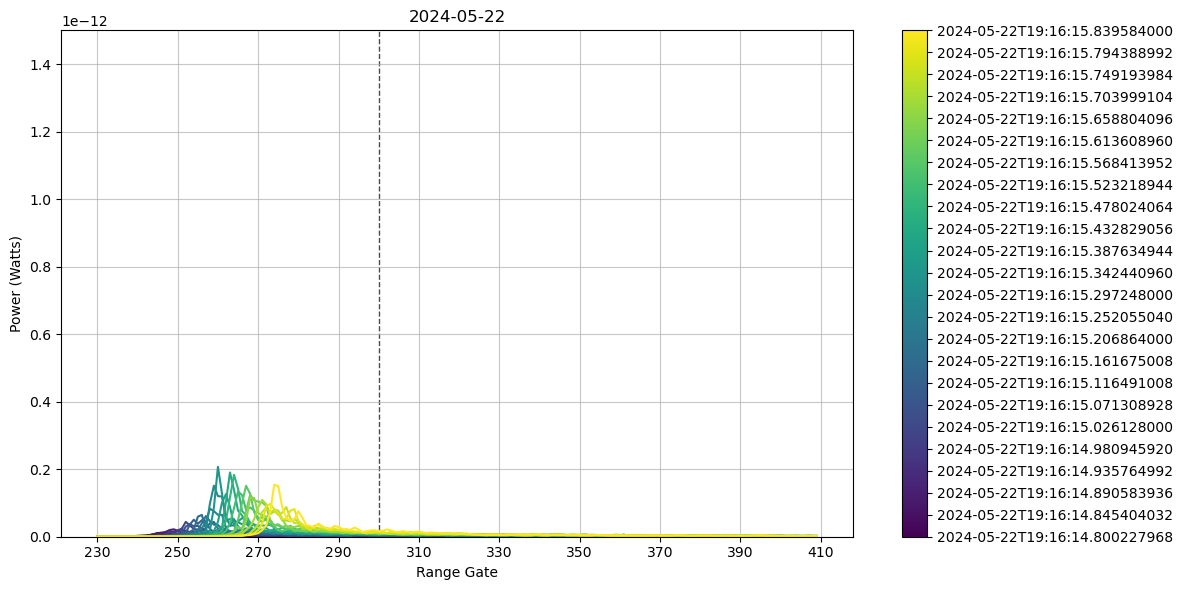

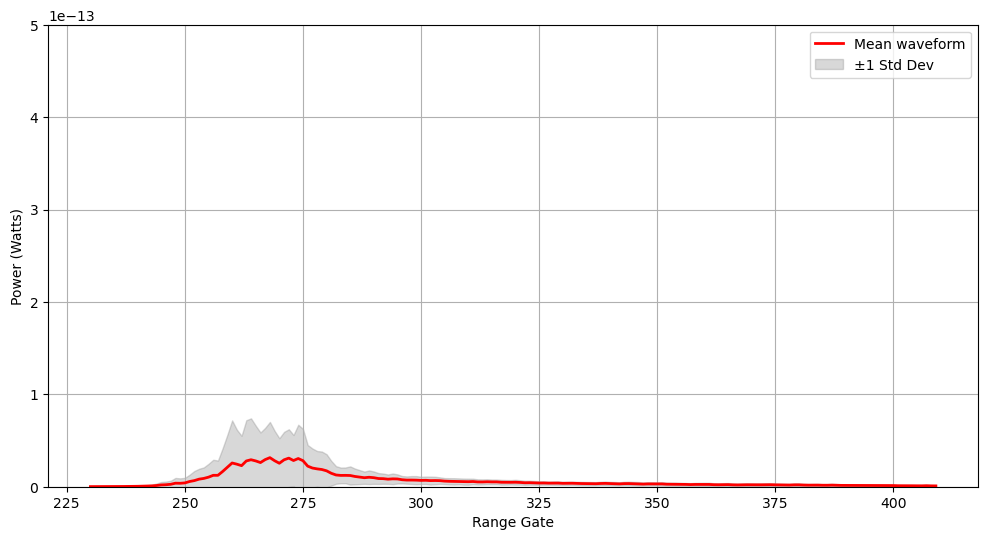

In [32]:
# plot_wfm_one(ds2_bbox, bin_start=230, bin_end=410)
plot_wfm_one(ds2_bbox, bin_start=230, bin_end=410, ylim=1.5e-12)
# plt.savefig('thick_20240519.png')
# plt.savefig('thick_20240519_ylim.png')
# plt.savefig('thin_20240522.png')
plt.savefig('thin_20240522_ylim.png')


plot_wfm_mean(ds2_bbox, bin_start=230, bin_end=410, ylim=5e-13)
plt.savefig('thin_20240522_mean.png')


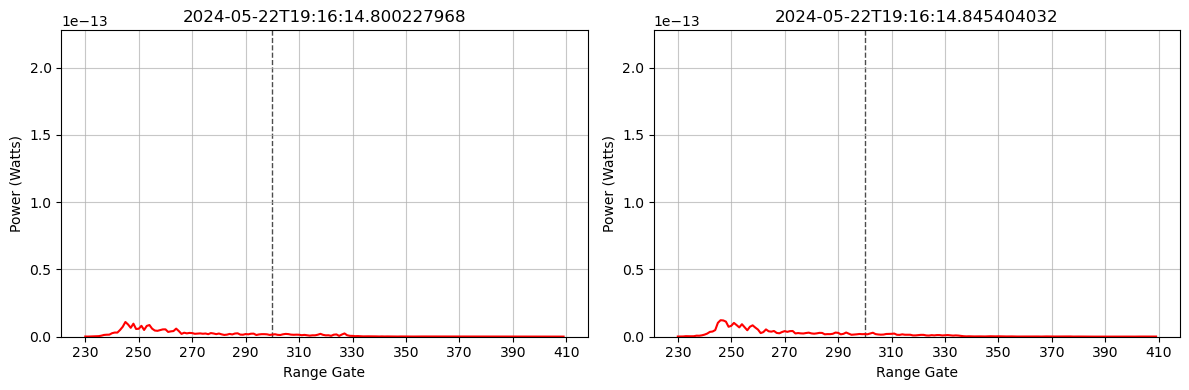

In [12]:
ds2_bbox_test = ds2_bbox.where(ds2_bbox.rec_count_20_ku==ds2.rec_count_20_ku.values.min()+94, drop=True) 

# for i in range(3):
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1x3 grid

for i, ax in enumerate(axes.flat):
    # plot_wfm(ds2_bbox, i, bin_start=270, bin_end=450, ax=ax)
    plot_wfm(ds2_bbox, i, bin_start=230, bin_end=410, ax=ax)
# plt.plot(ds2_bbox_test.pwr_waveform_20_ku[0, :])

In [31]:
plt.close('all')


In [247]:
# len(ds2_bbox.rec_count_20_ku)
# ds1_bbox.time_20_ku
# ds2_bbox.time_20_ku

In [296]:
# Thin 
n_to_plot = len(ds1_bbox.rec_count_20_ku)
ylim = 1.5e-12#10e-13
for i in range(n_to_plot):
    j = n_to_plot - i - 1
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    plot_wfm(ds1_bbox, i, bin_start=270, bin_end=450, ylim = ylim, ax=axes[0])
    plot_wfm(ds2_bbox, j, bin_start=230, bin_end=410, ylim = ylim, ax=axes[1])
    plt.savefig(f"wfm_fig{i}.png")
plt.close('all')


C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\1730869135.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))


C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\1965372614.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))


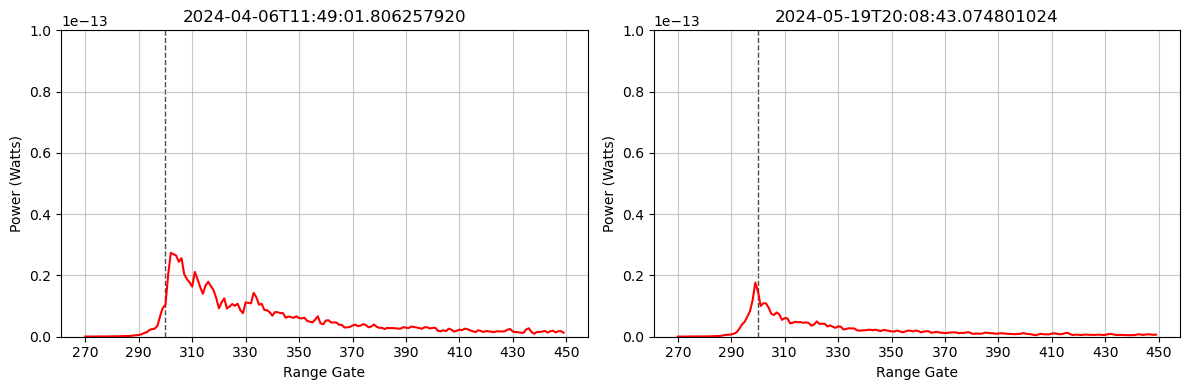

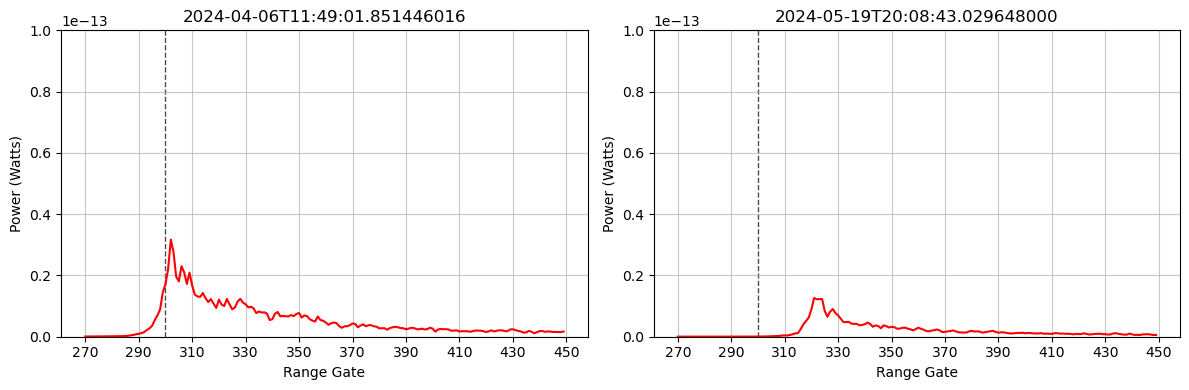

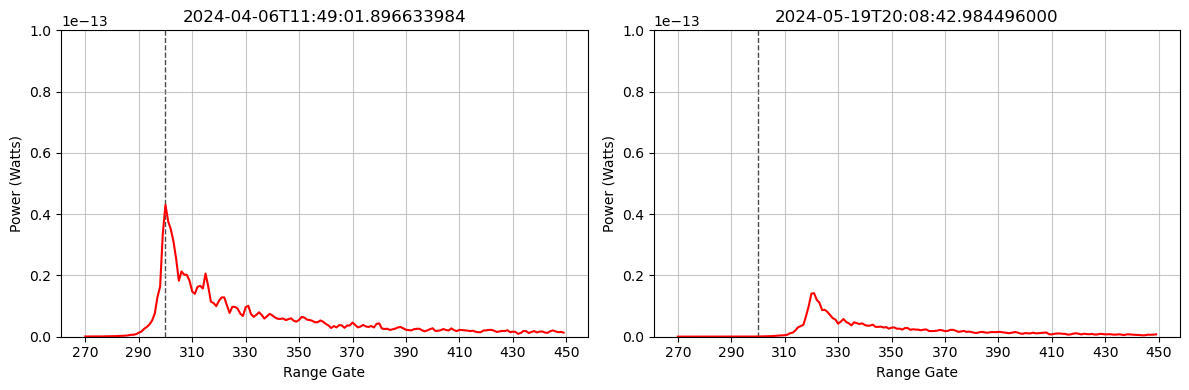

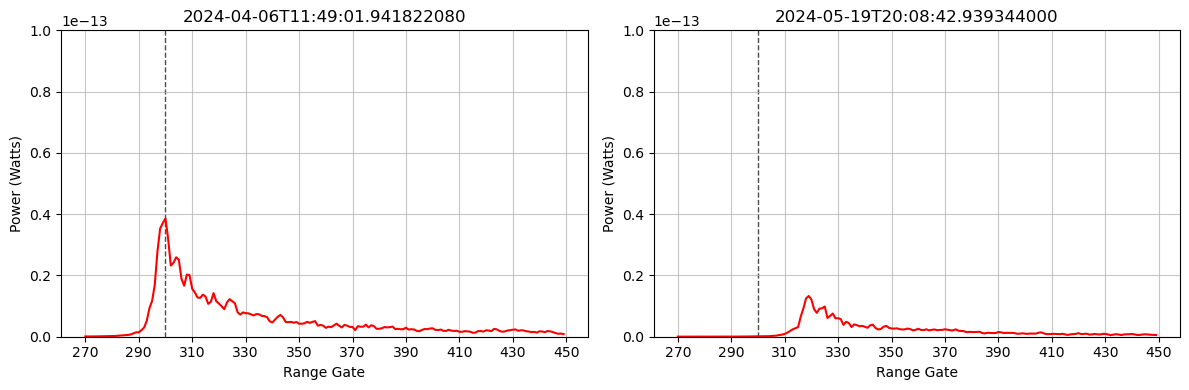

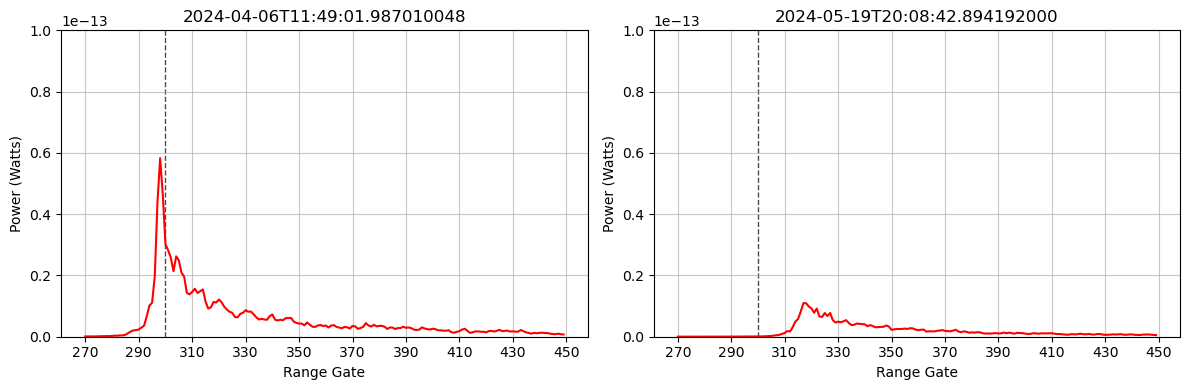

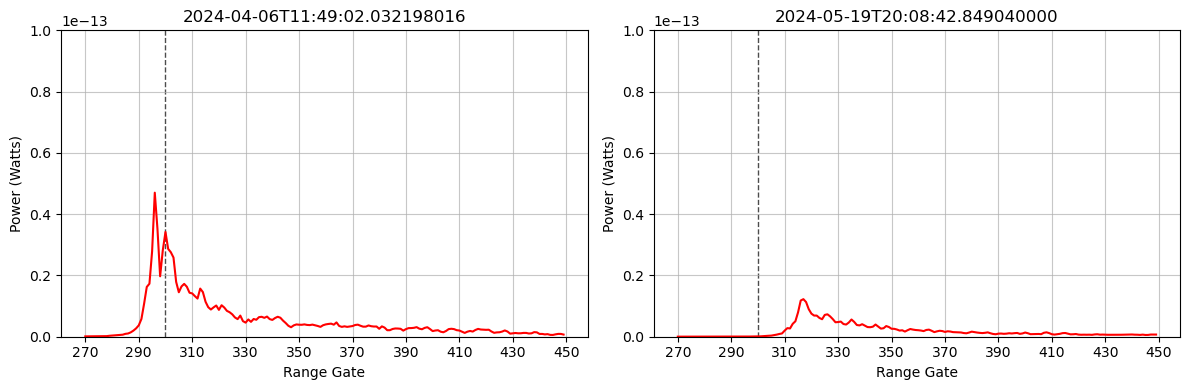

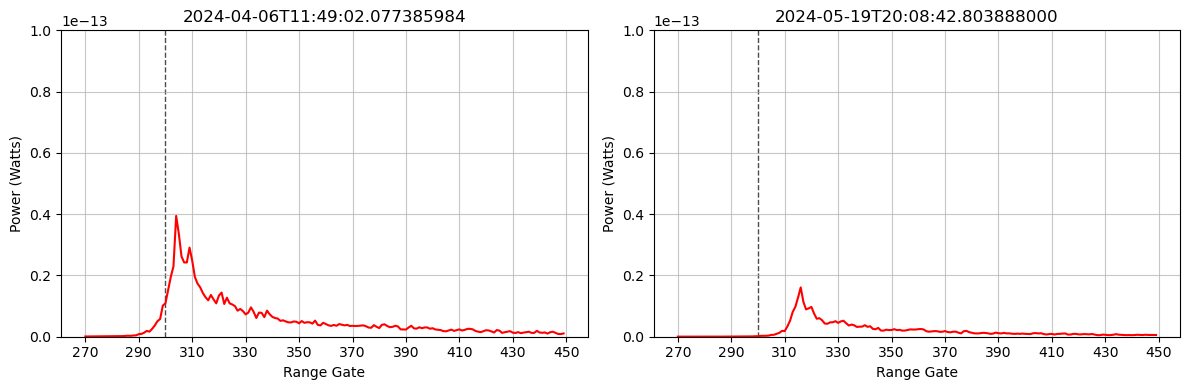

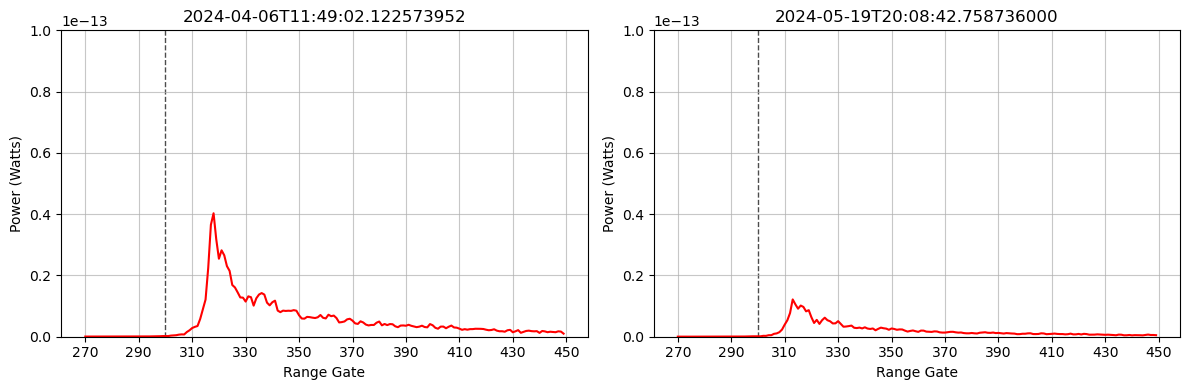

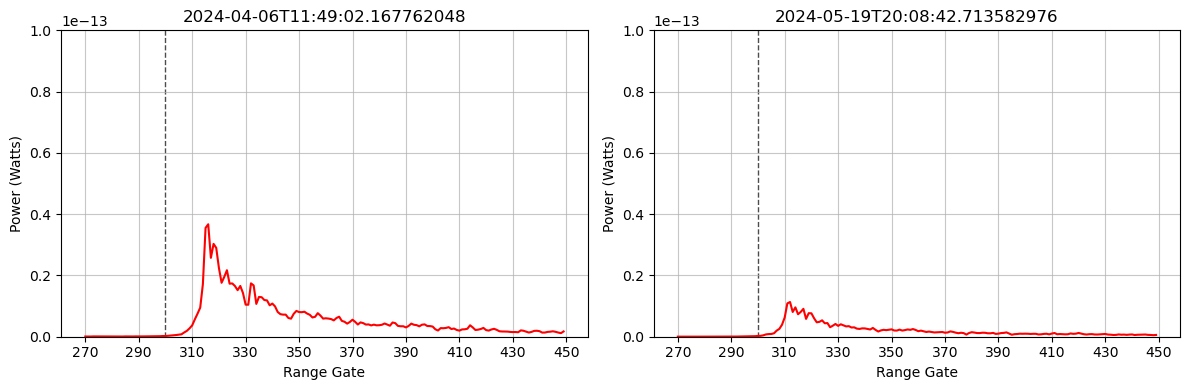

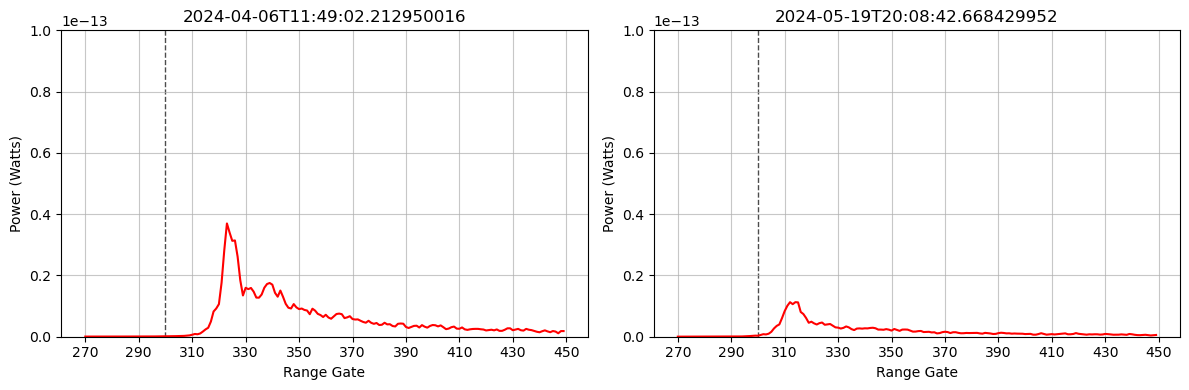

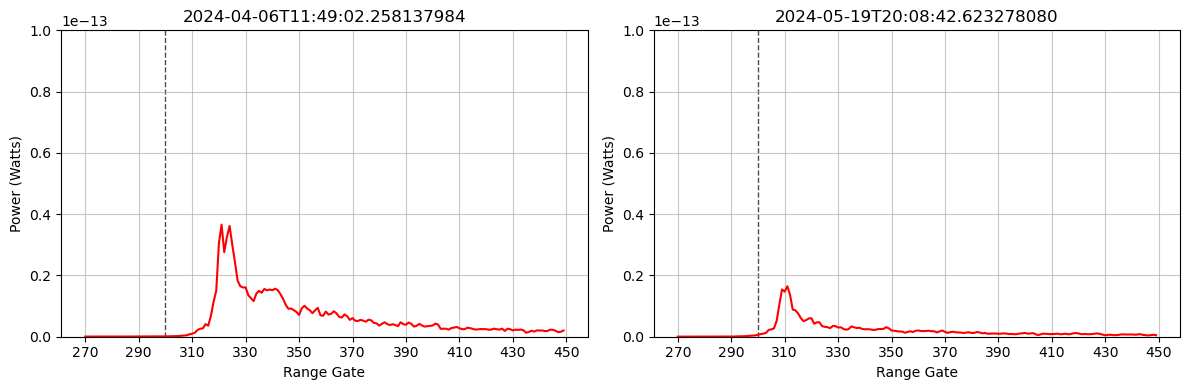

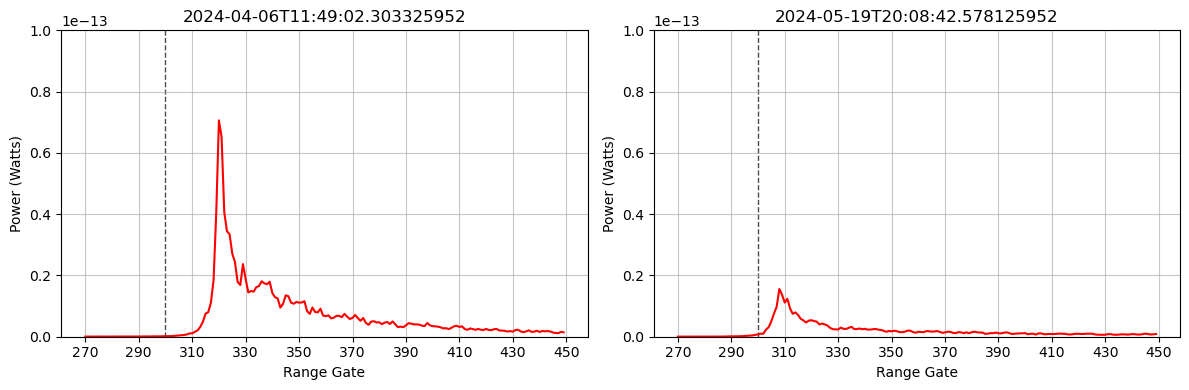

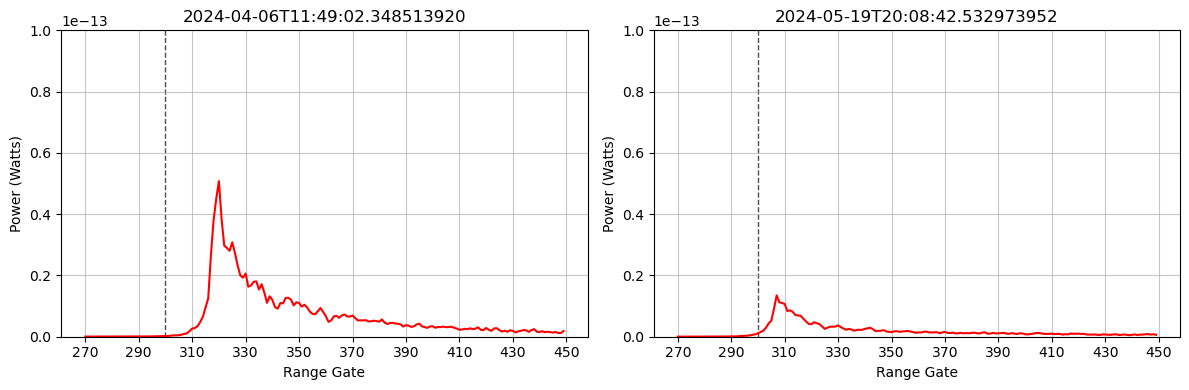

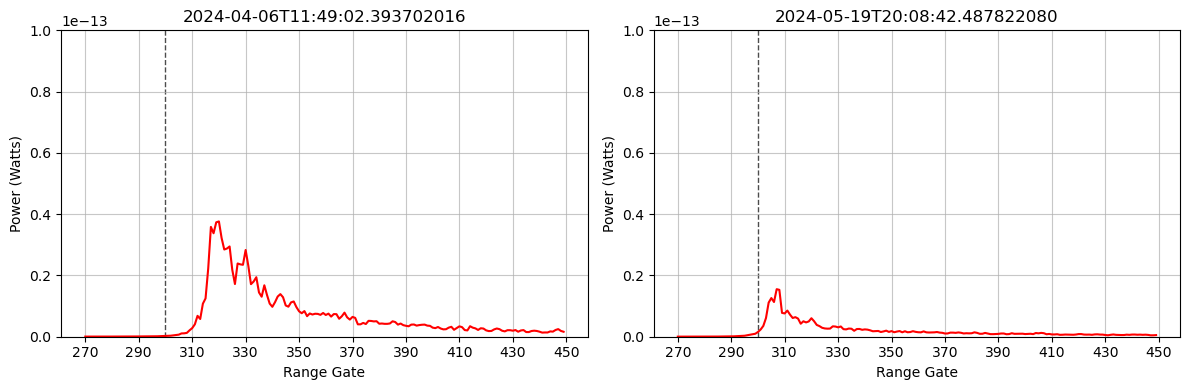

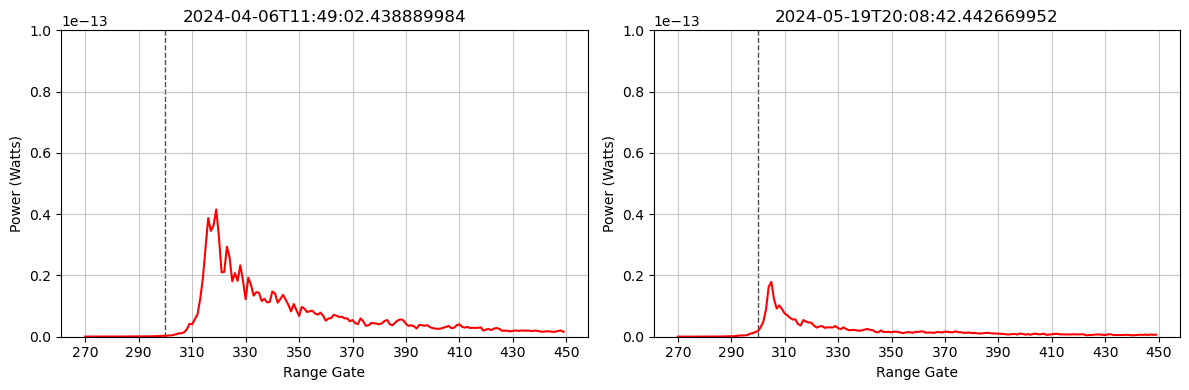

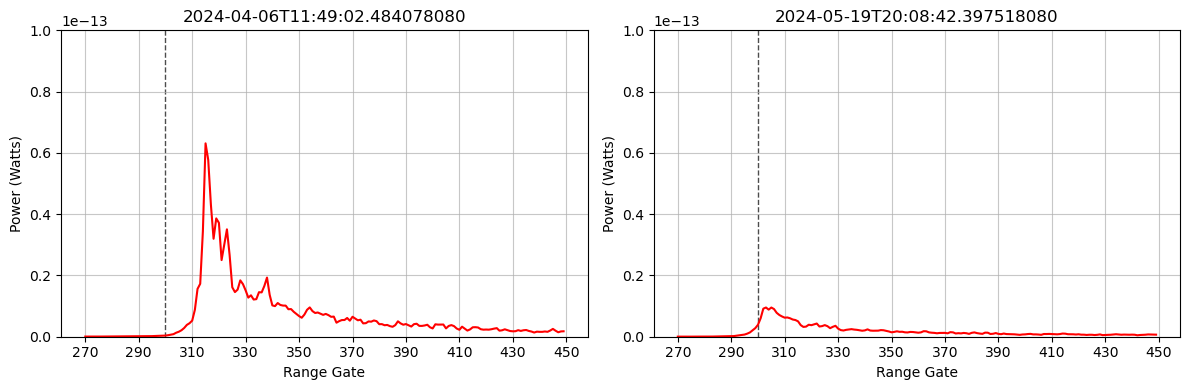

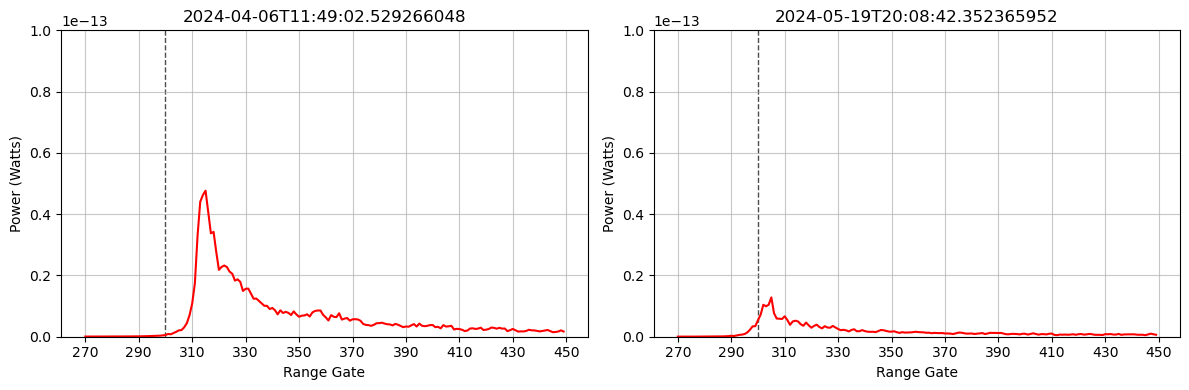

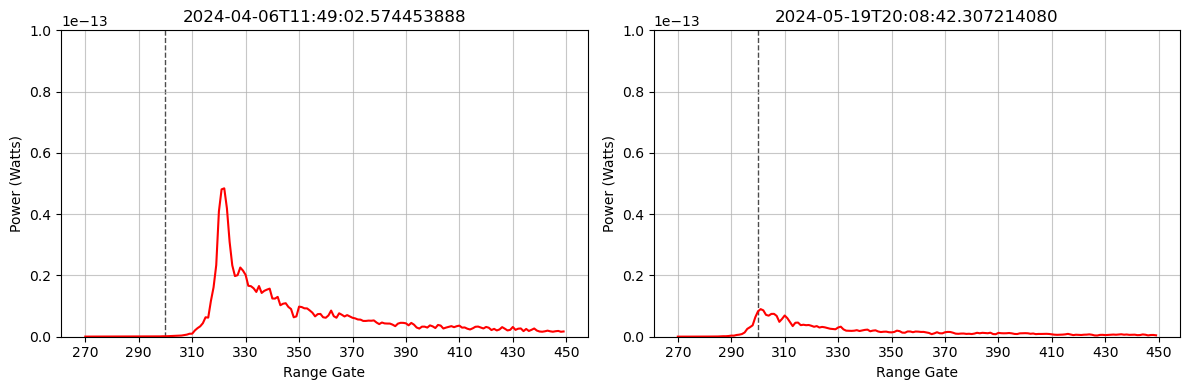

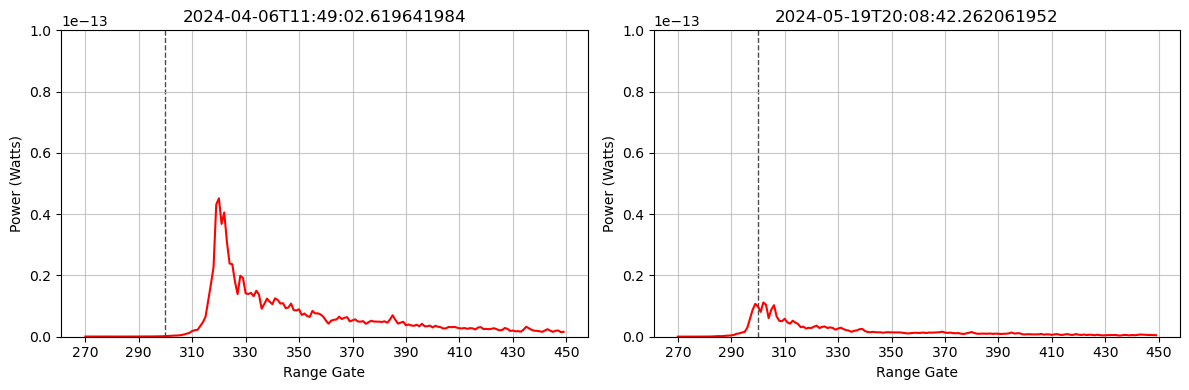

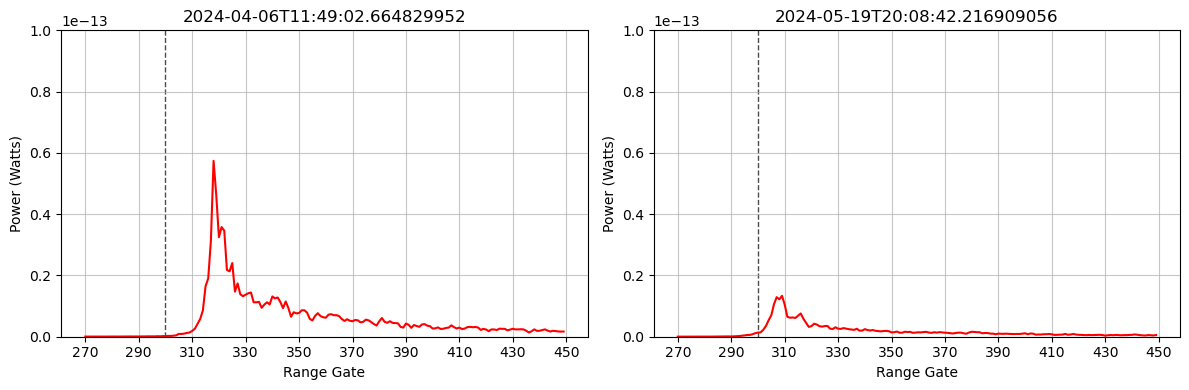

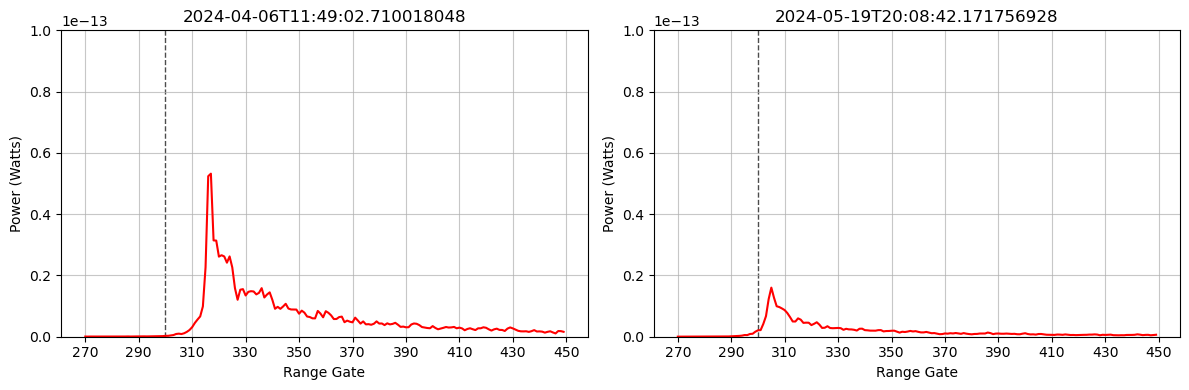

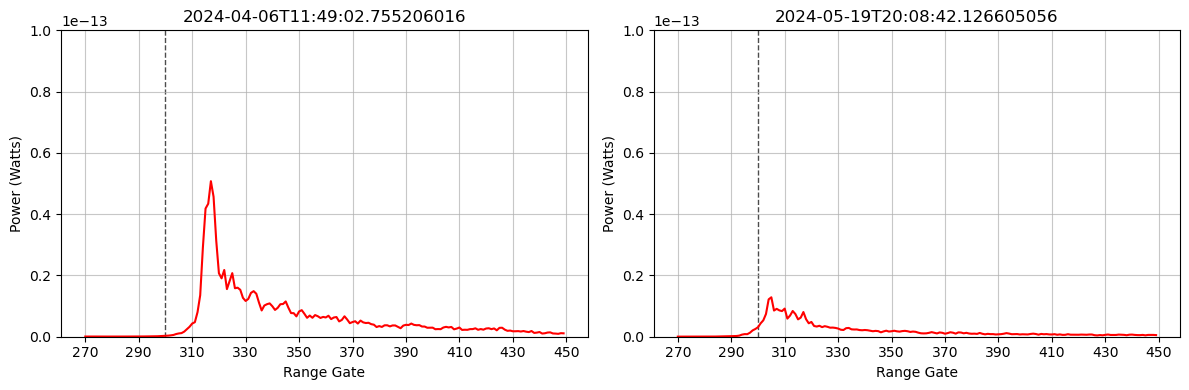

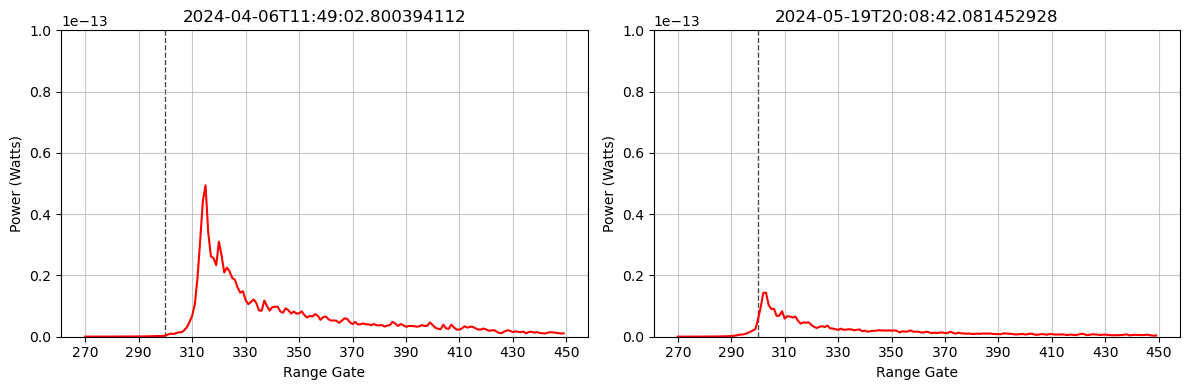

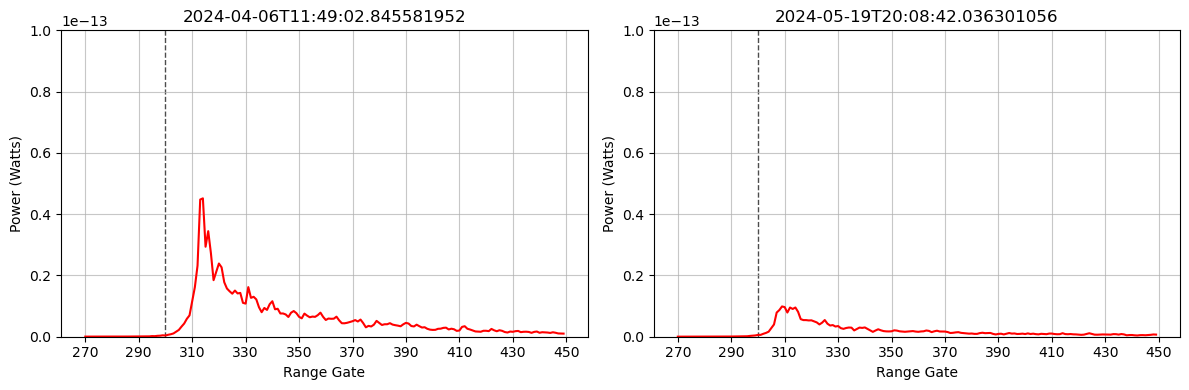

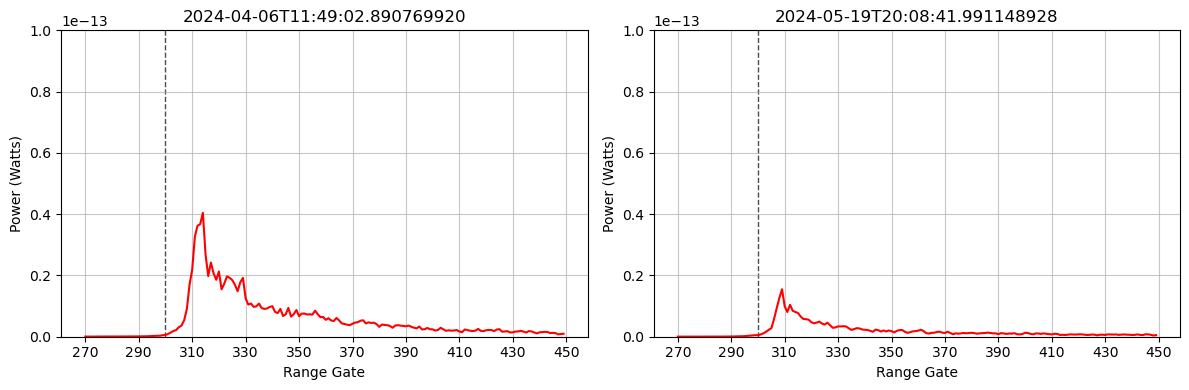

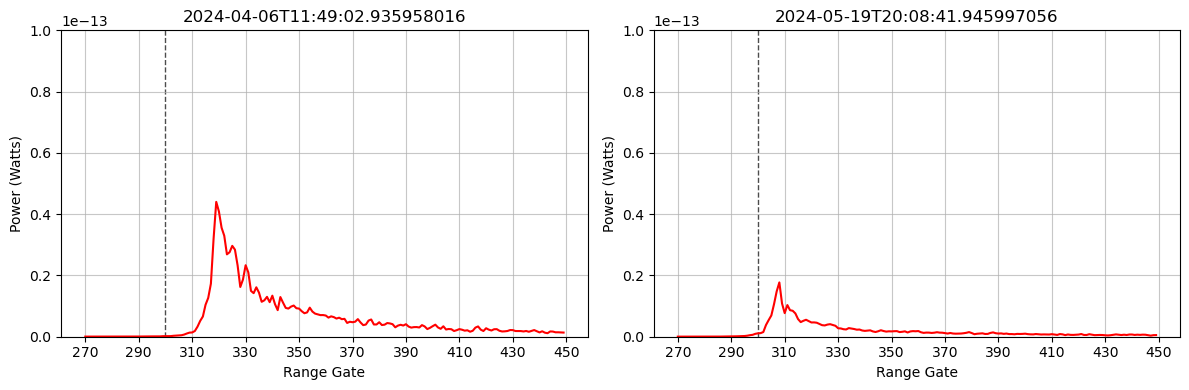

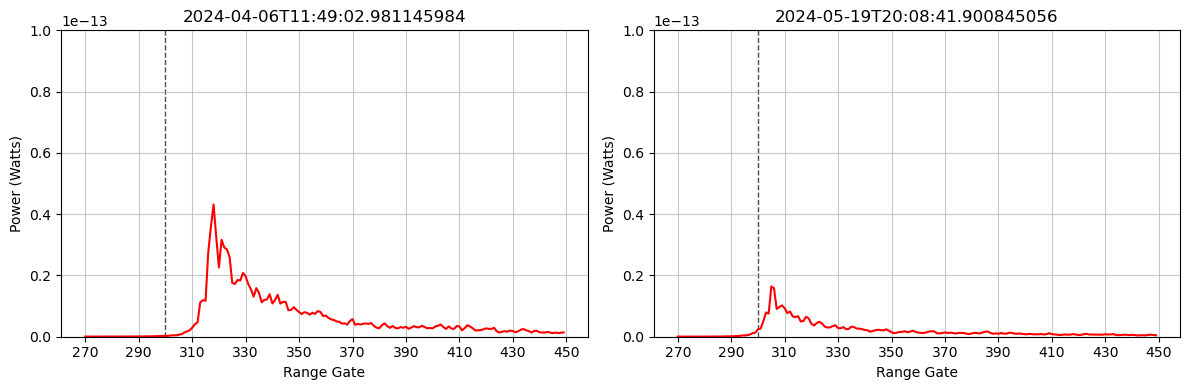

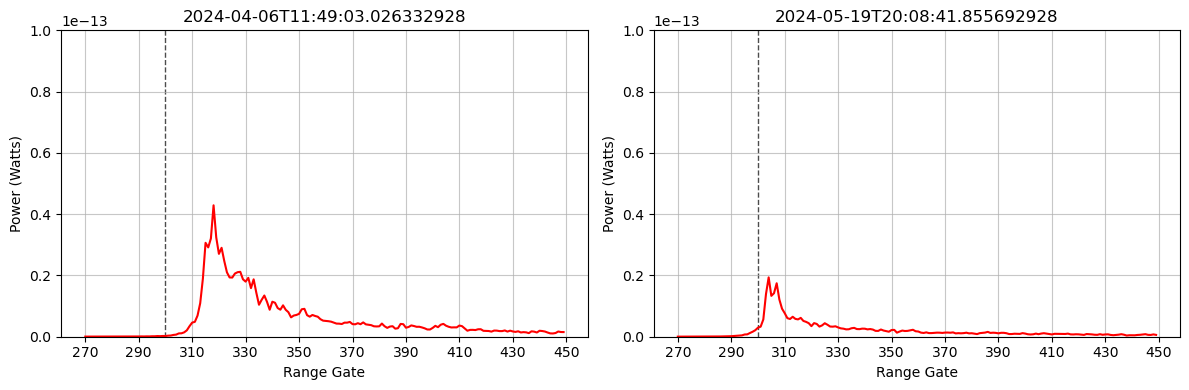

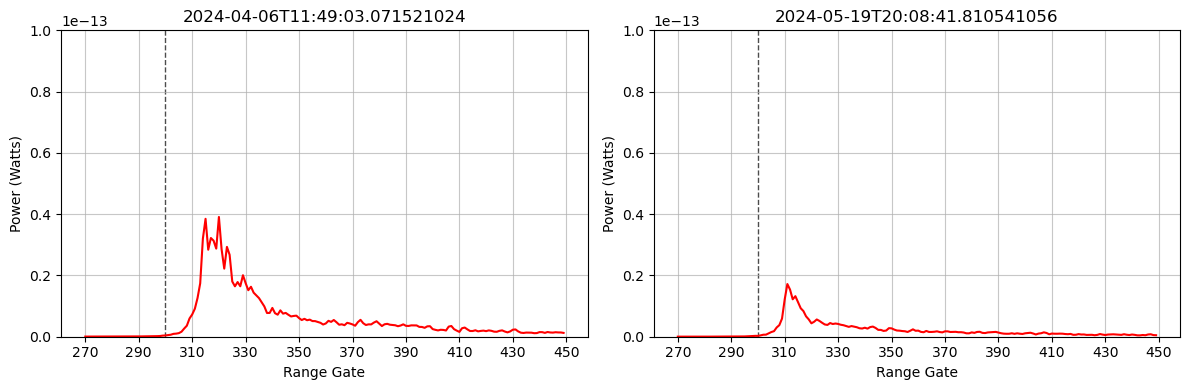

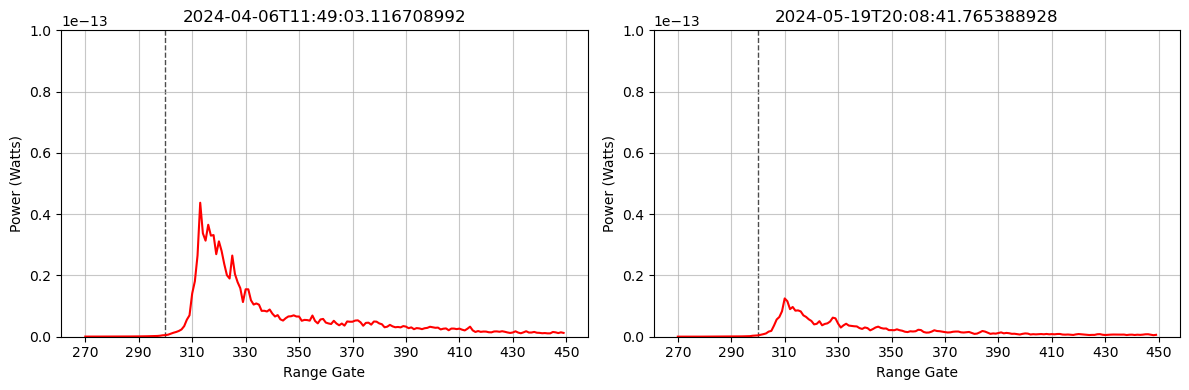

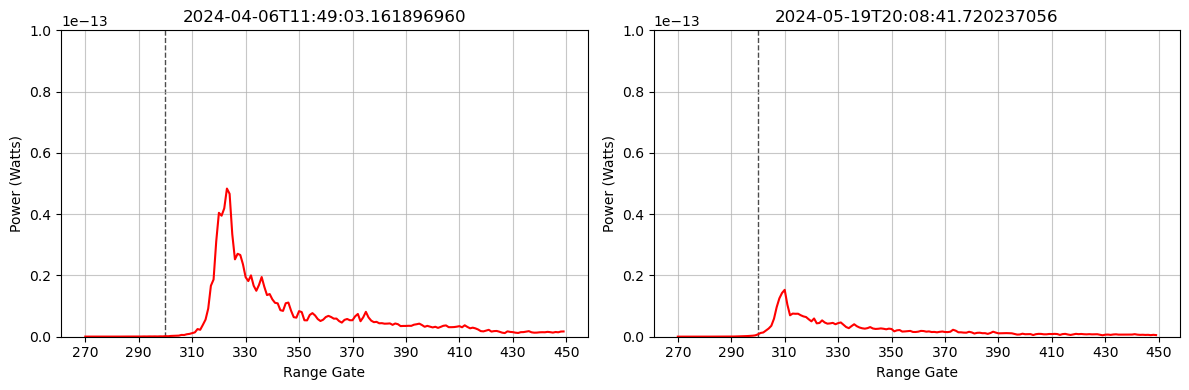

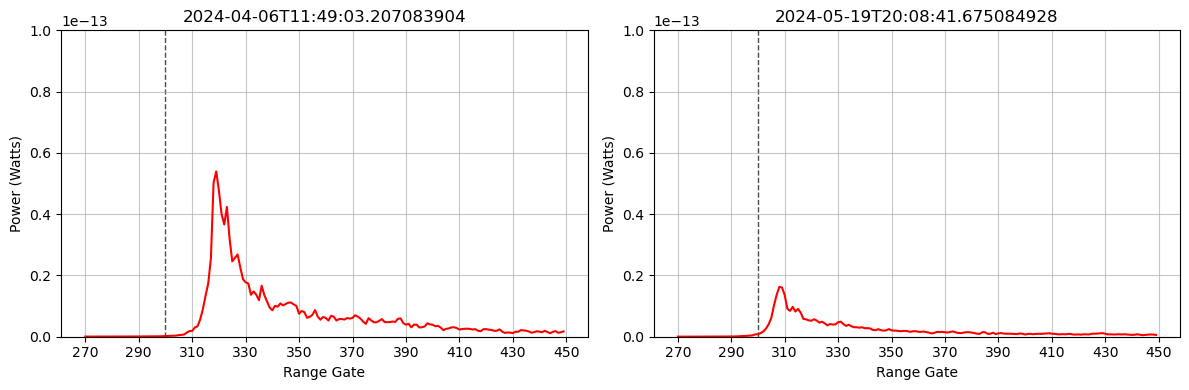

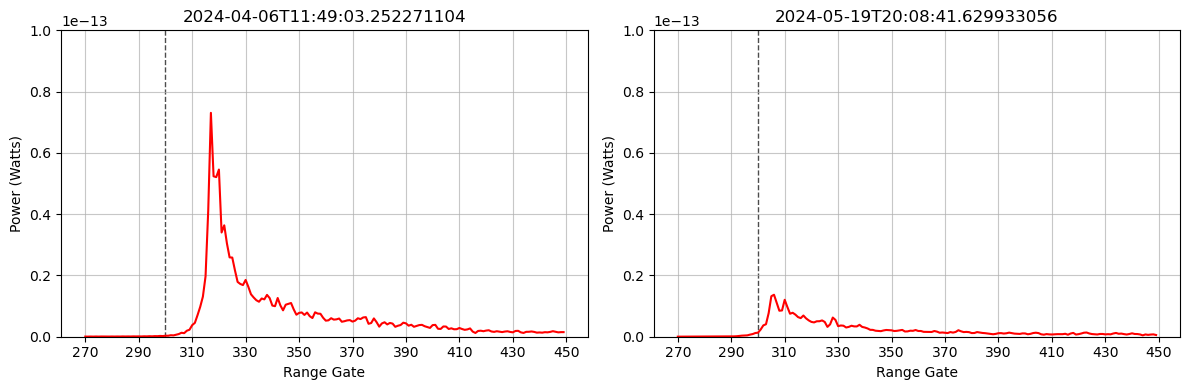

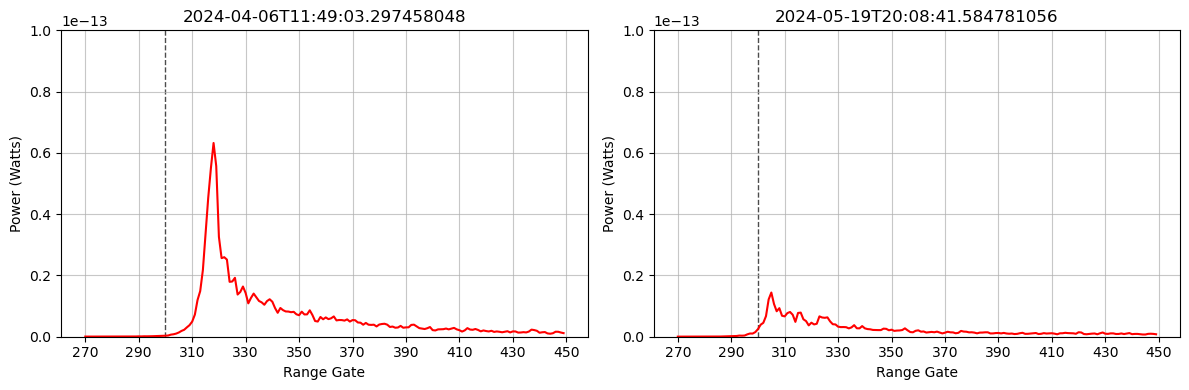

In [276]:
# Thick 
n_to_plot = len(ds1_bbox.rec_count_20_ku)

for i in range(n_to_plot):
    j = n_to_plot - i - 1
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    plot_wfm(ds1_bbox, i, bin_start=270, bin_end=450, ylim = 1e-13, ax=axes[0])
    plot_wfm(ds2_bbox, j, bin_start=270, bin_end=450, ylim = 1e-13, ax=axes[1])
    plt.savefig(f"wfm_fig{i}.png")


C:\Users\SmartICE_Calgary\AppData\Local\Temp\ipykernel_29492\223656889.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


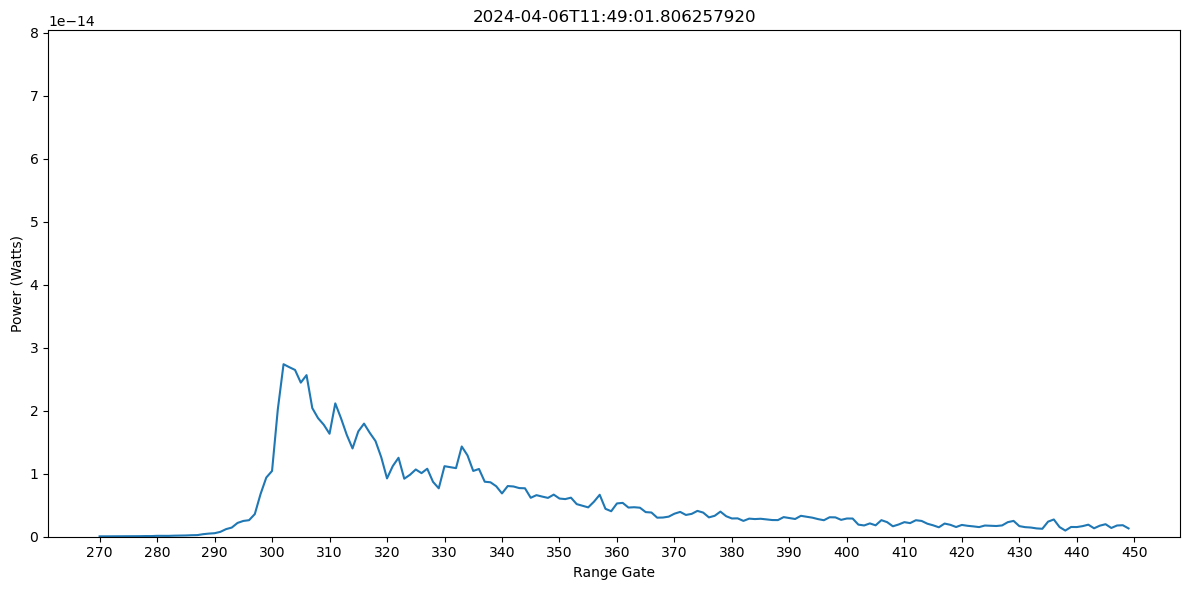

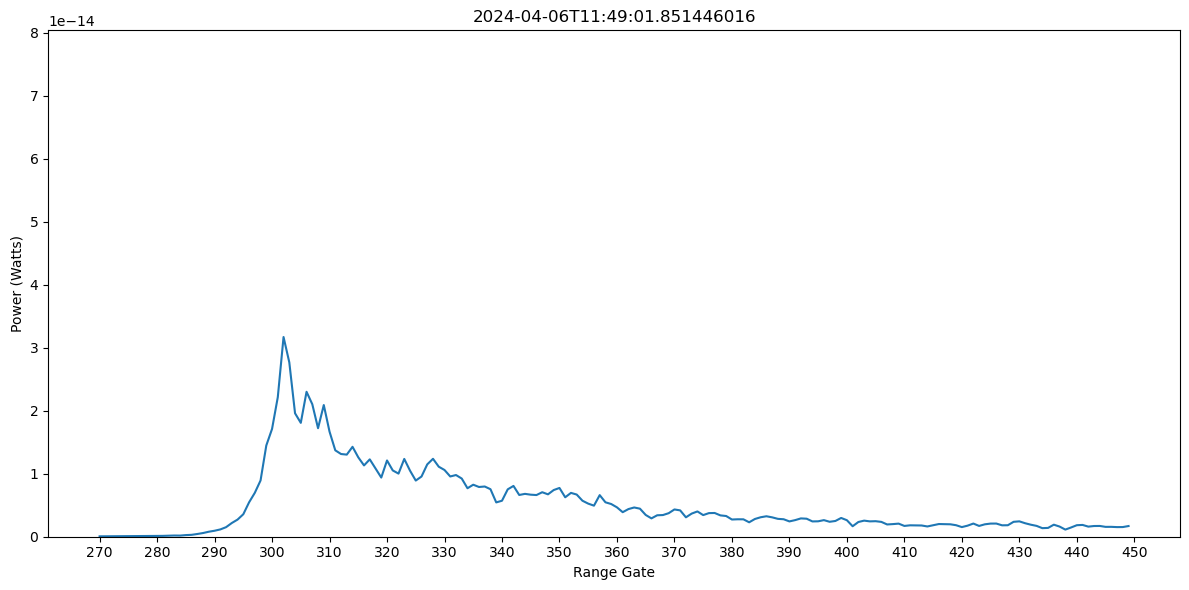

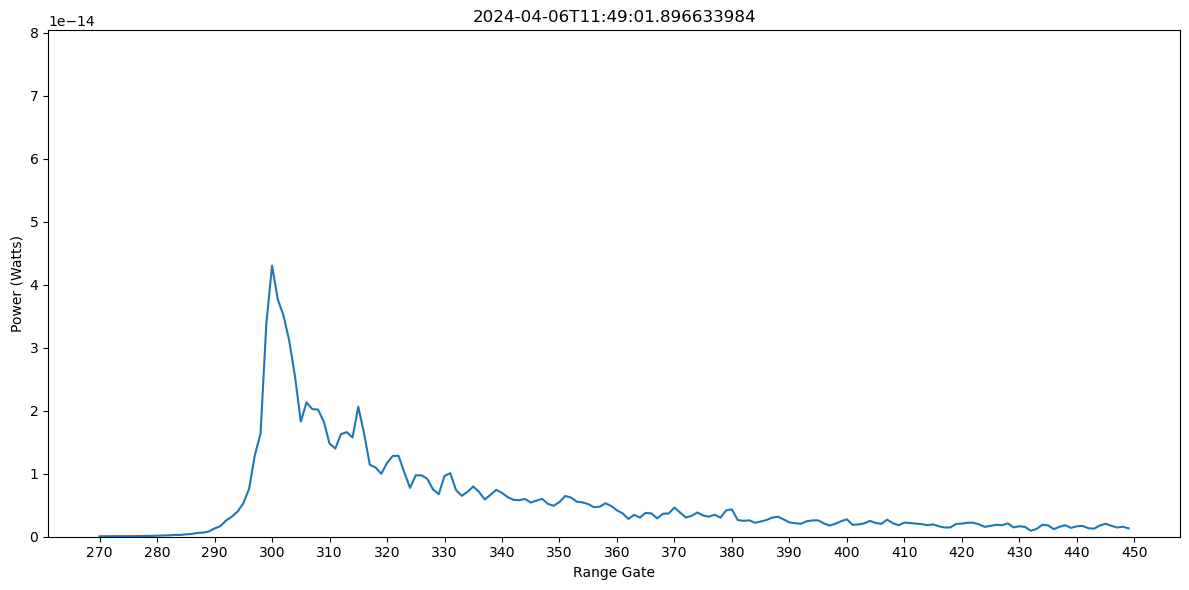

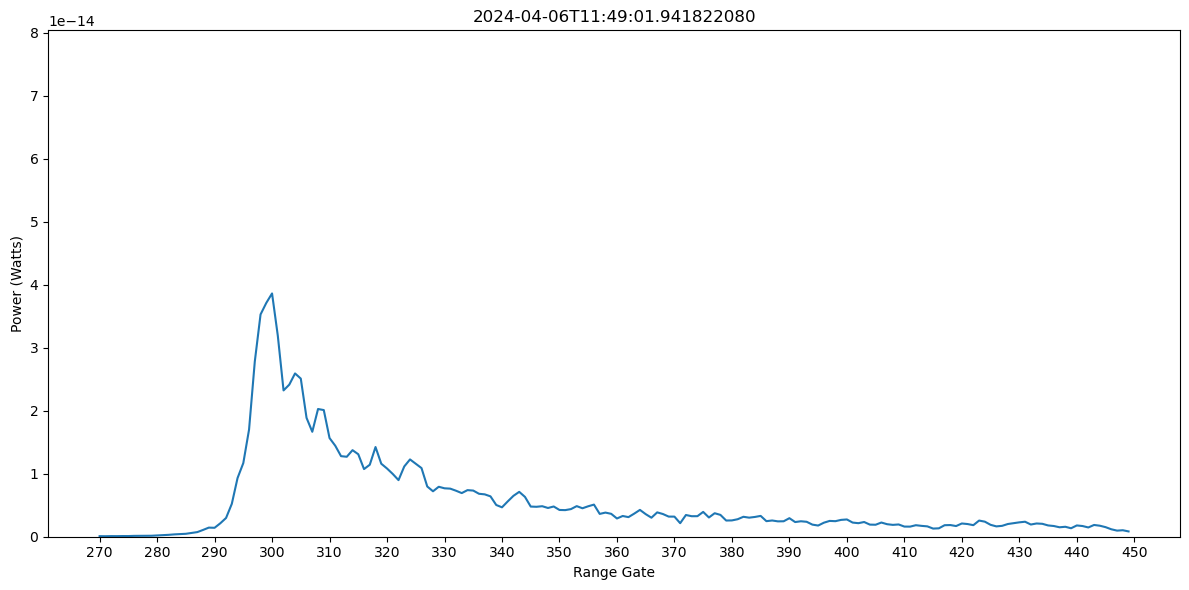

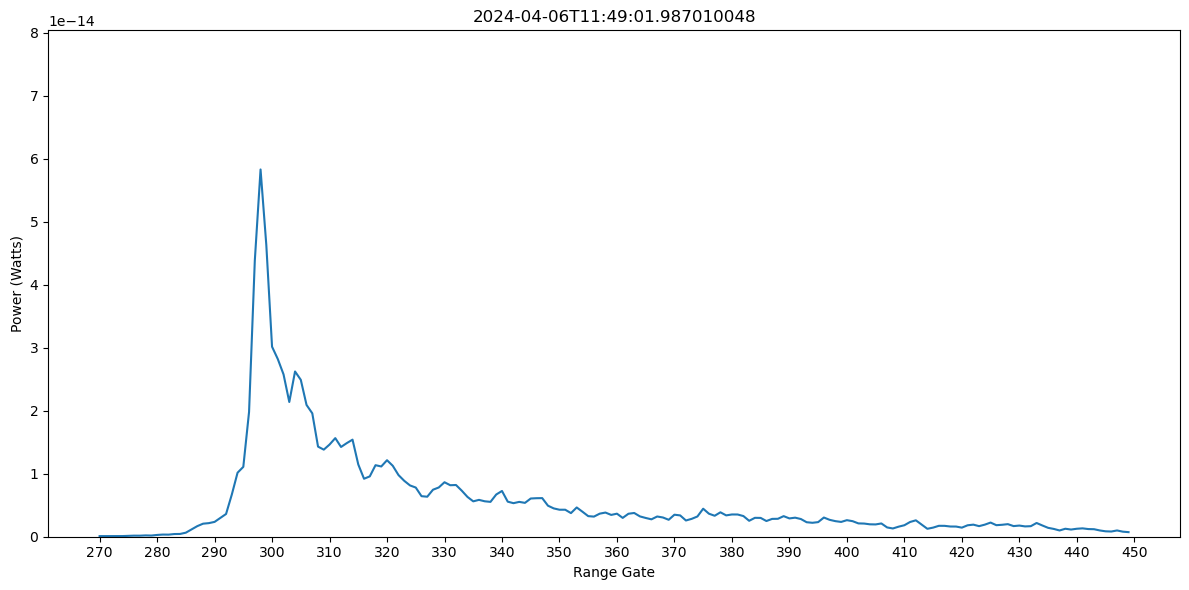

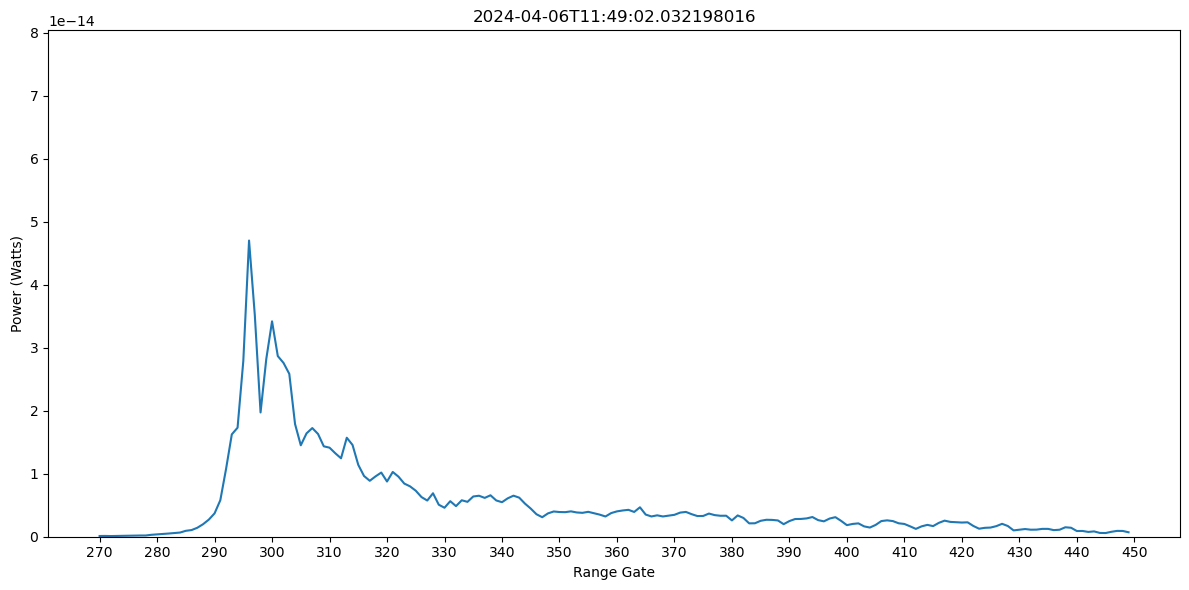

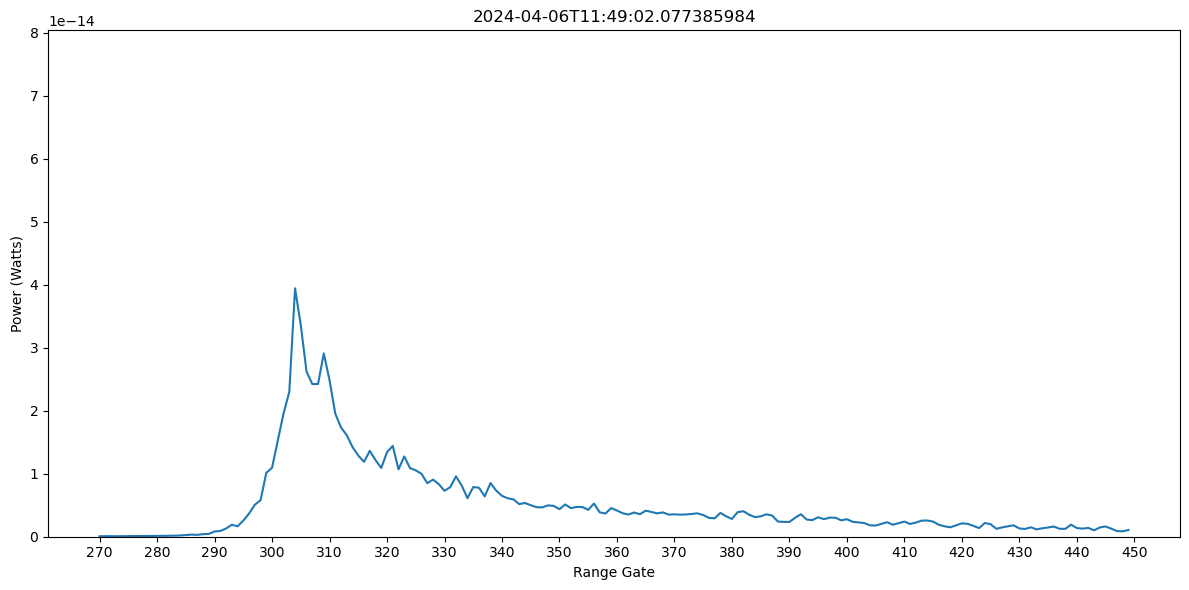

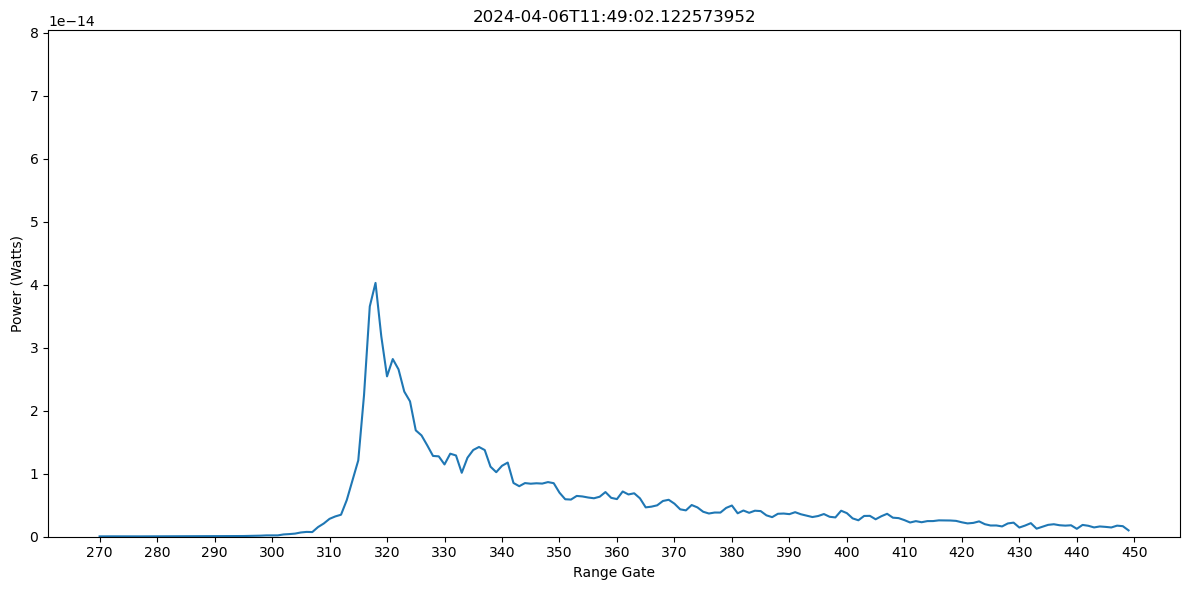

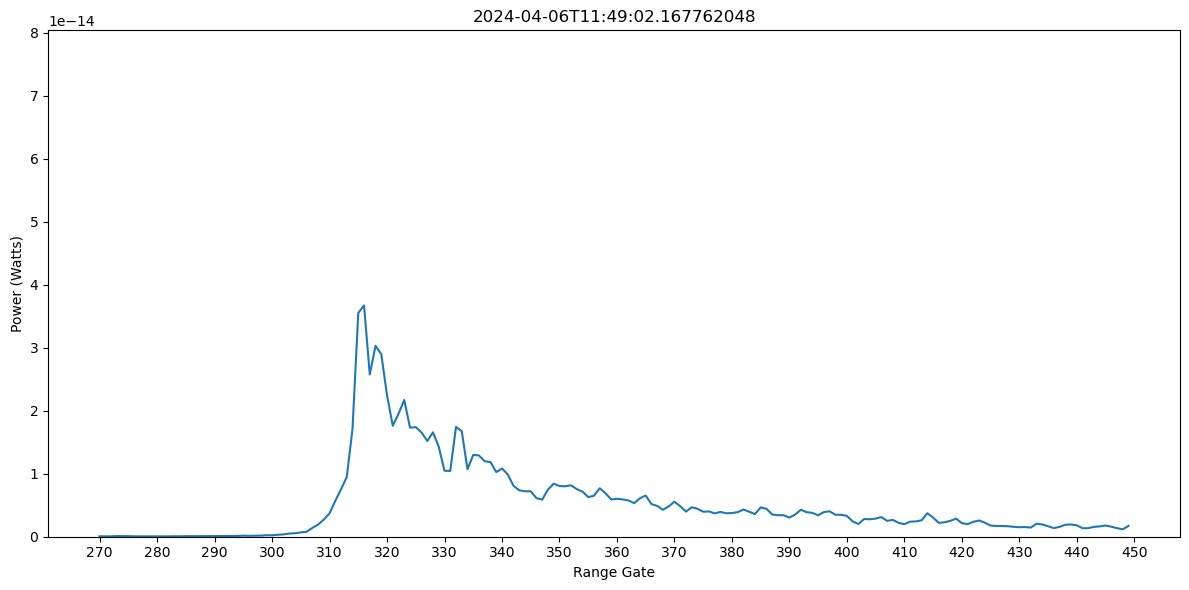

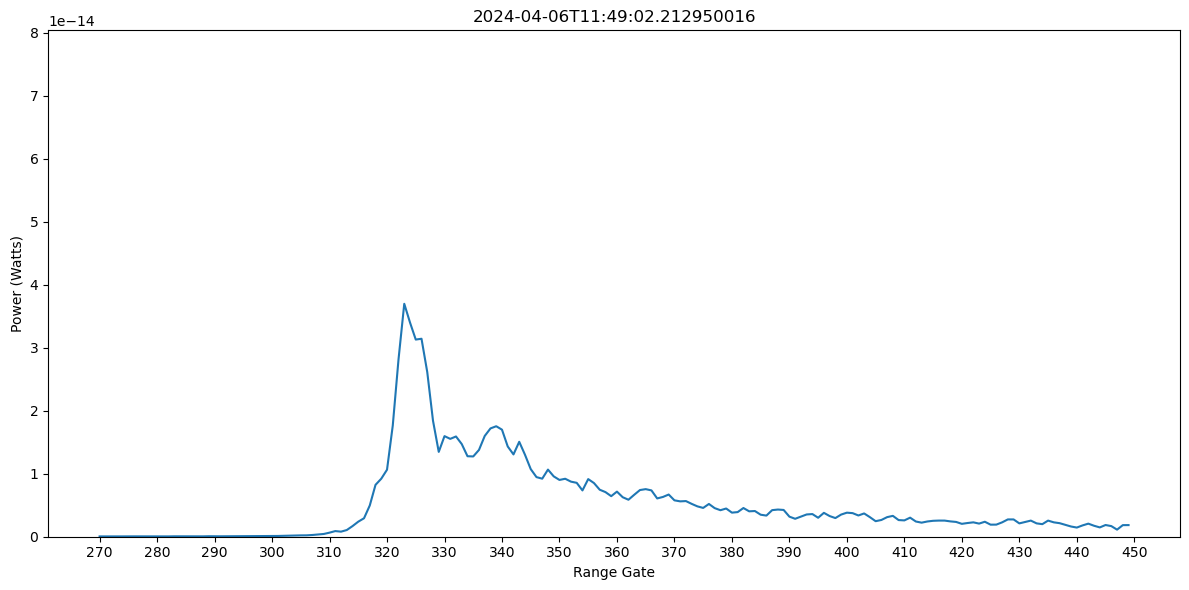

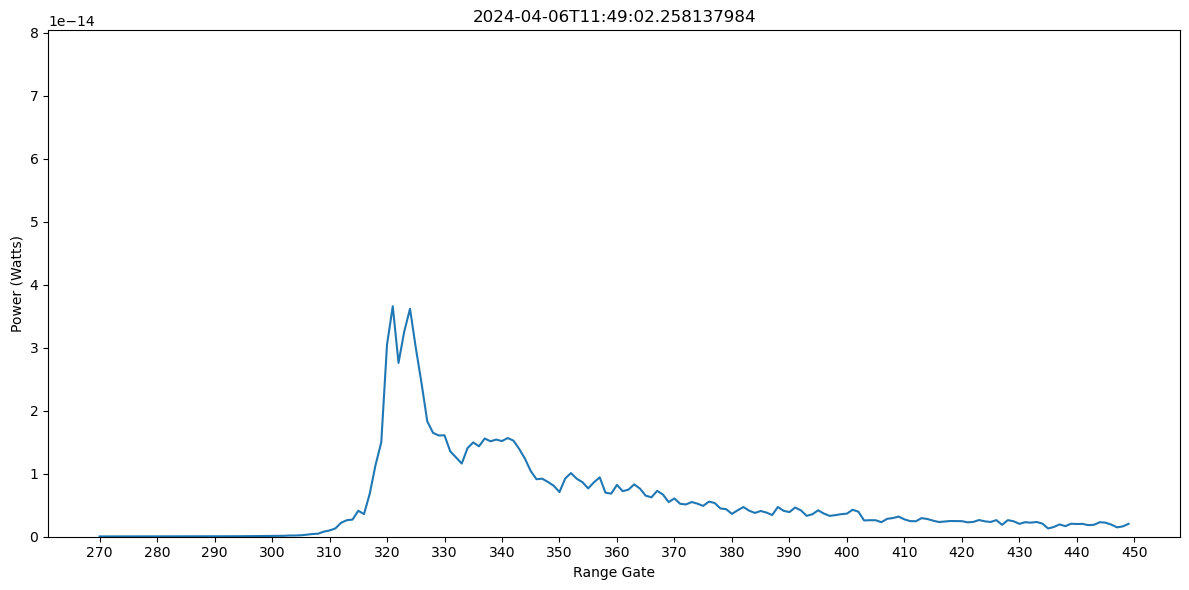

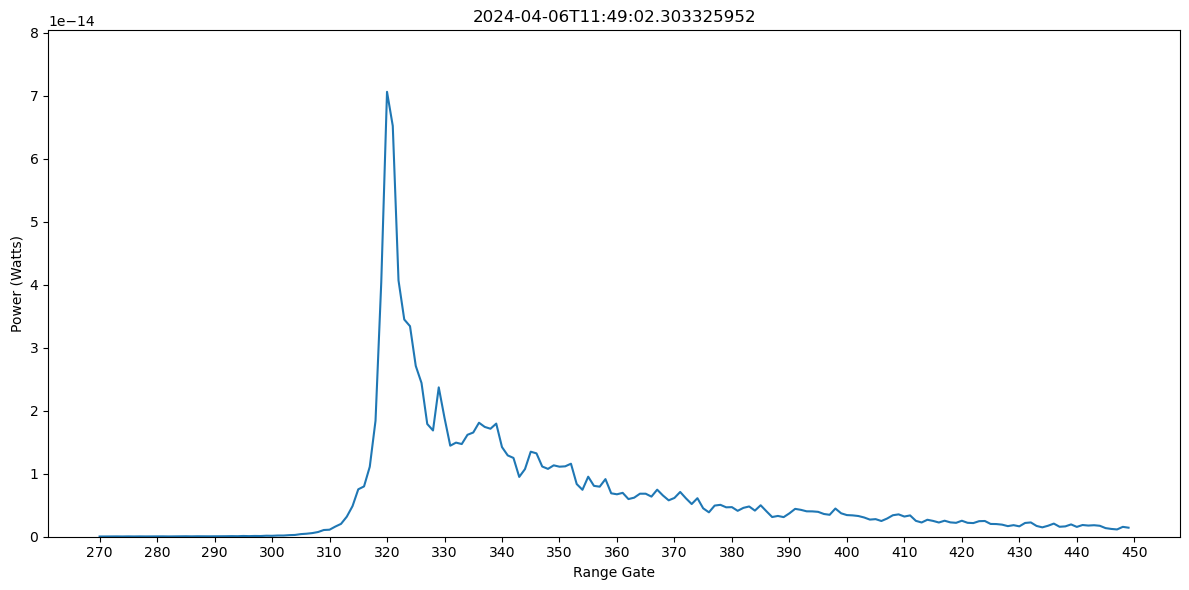

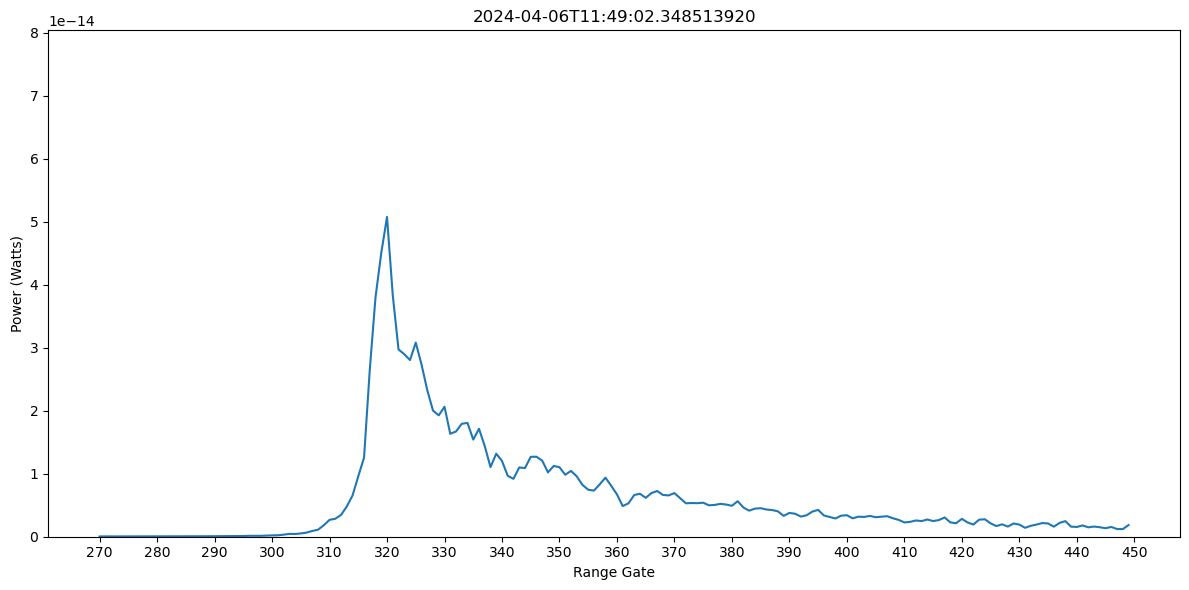

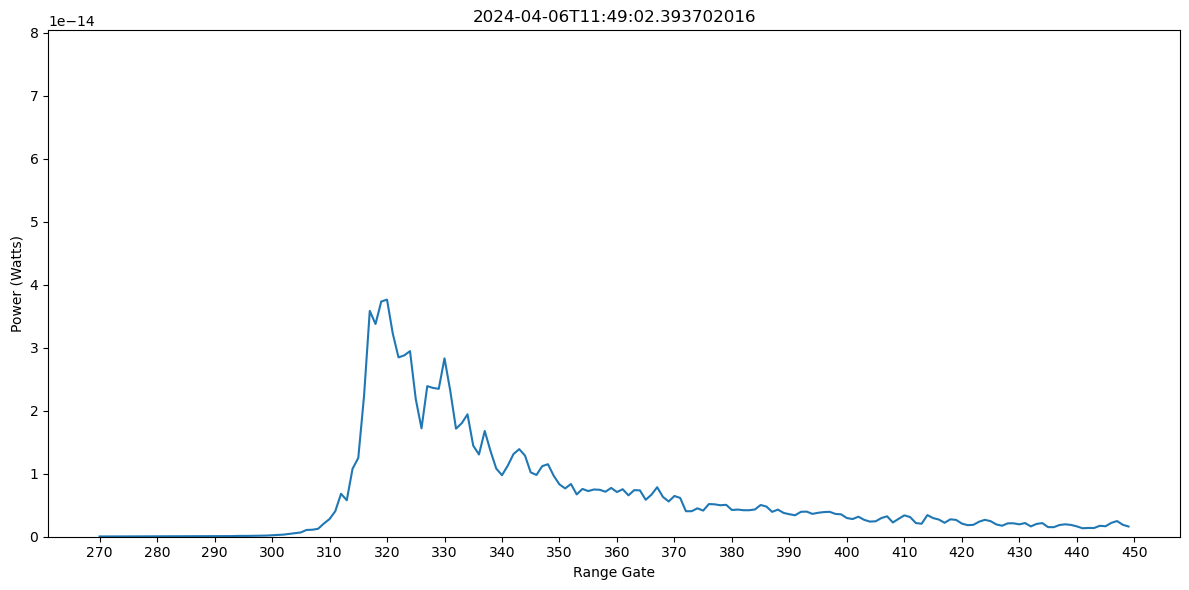

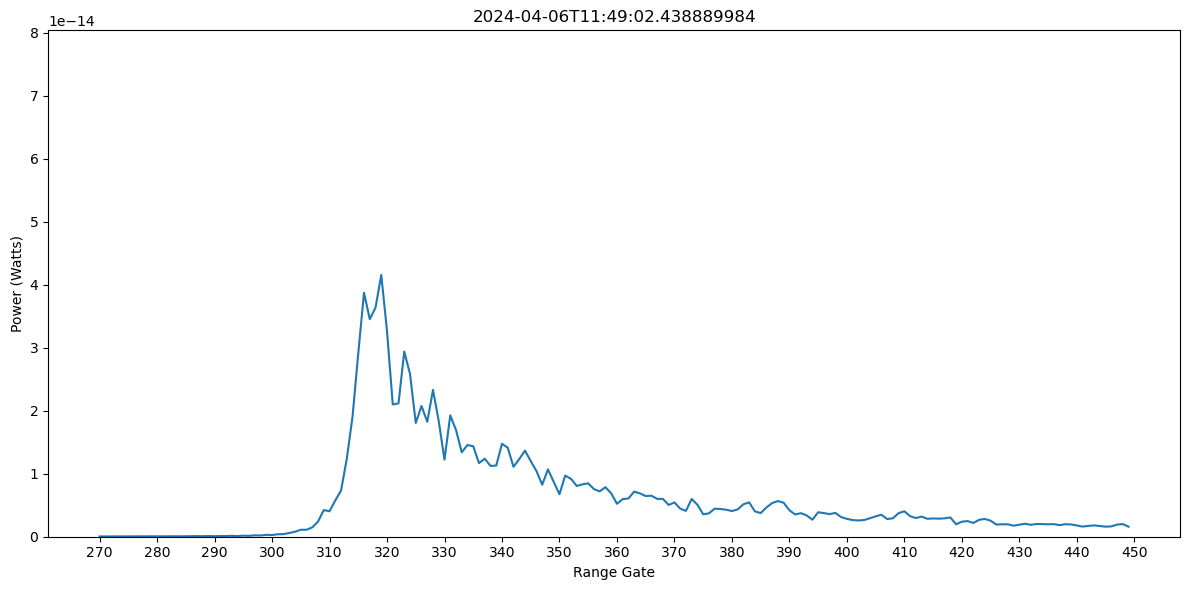

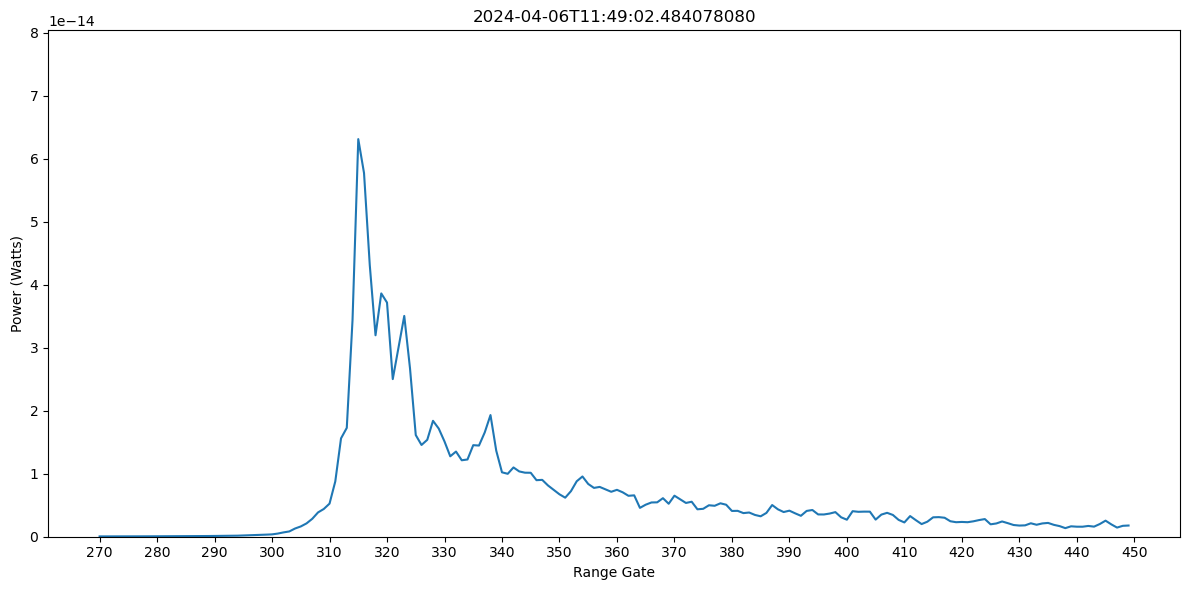

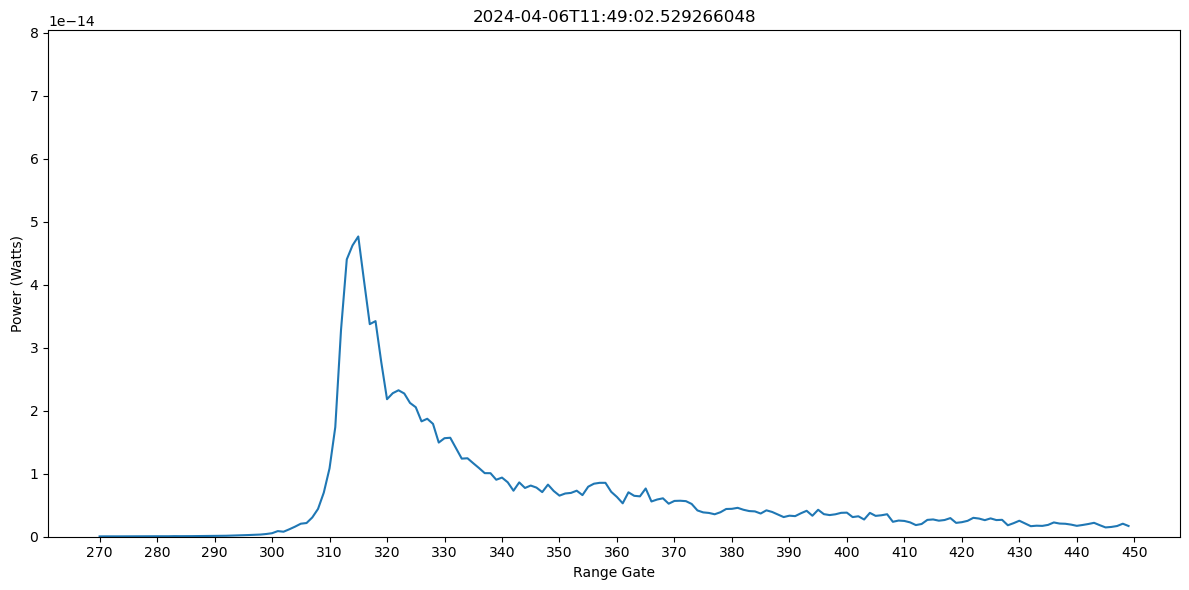

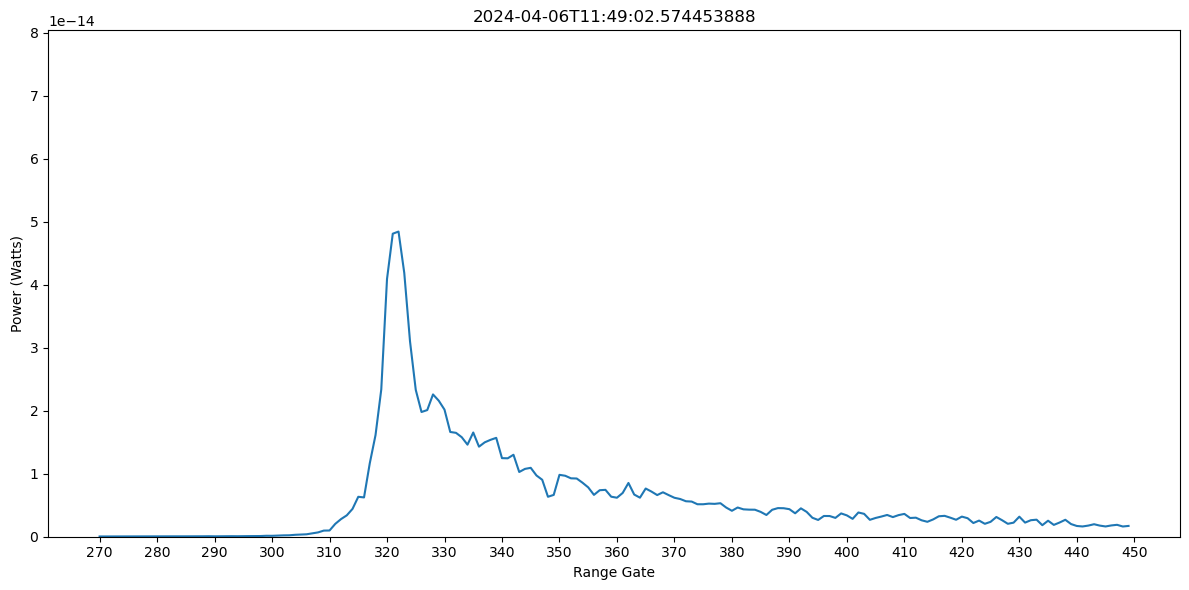

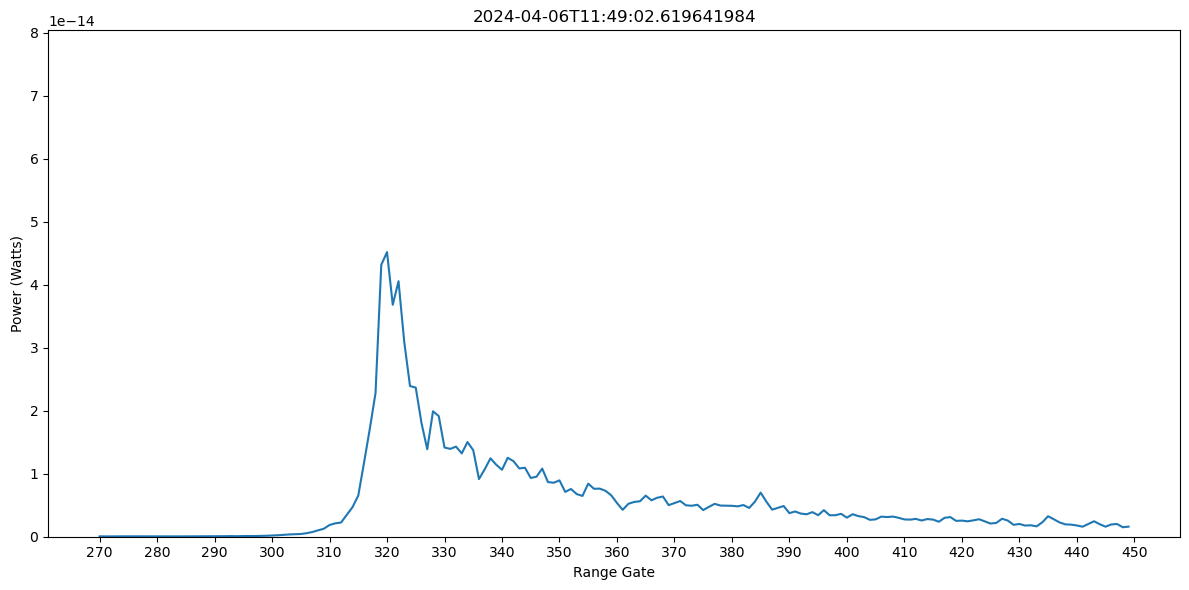

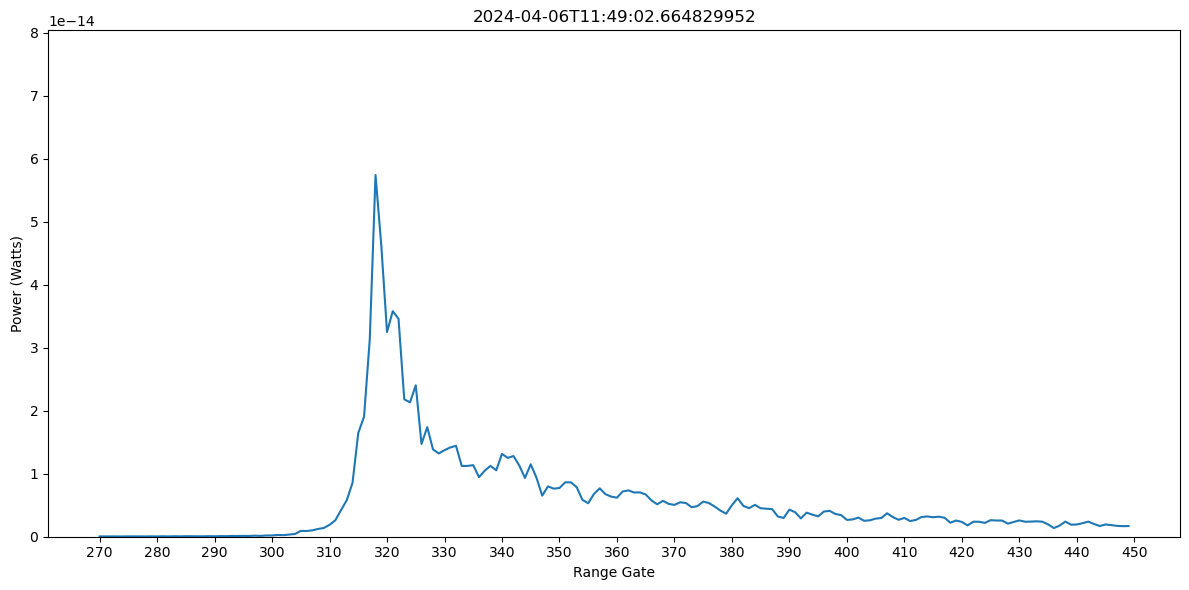

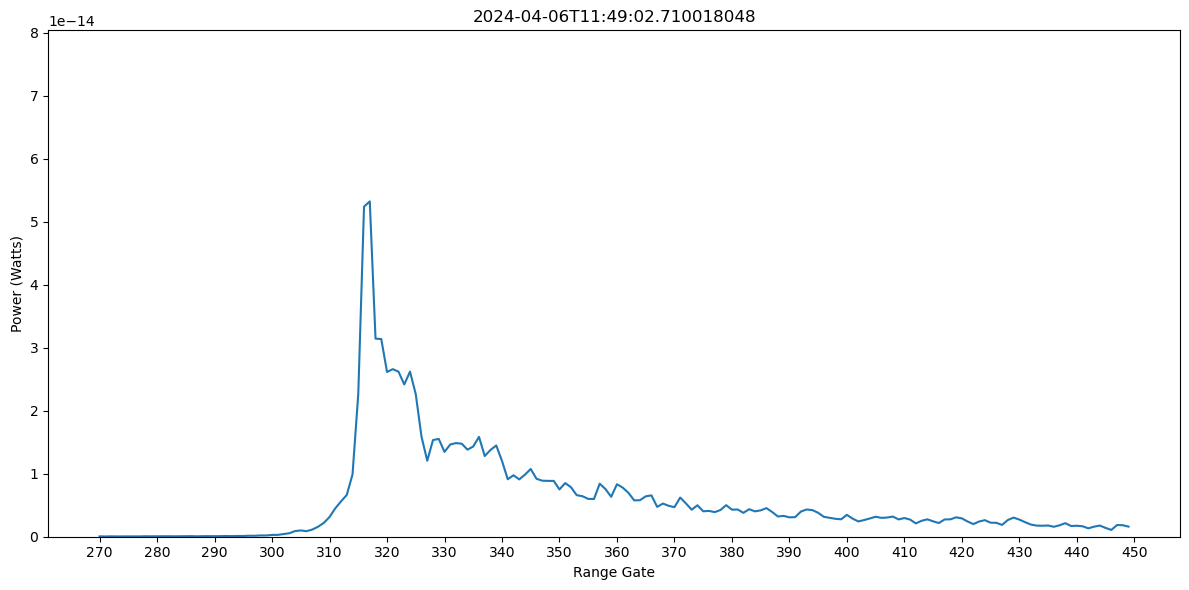

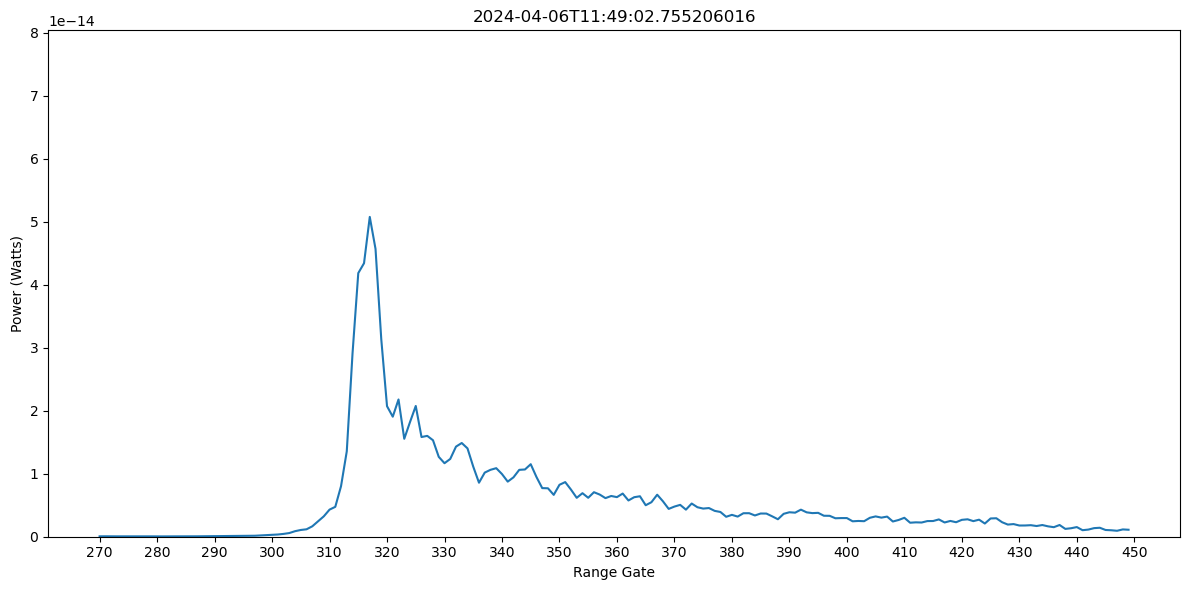

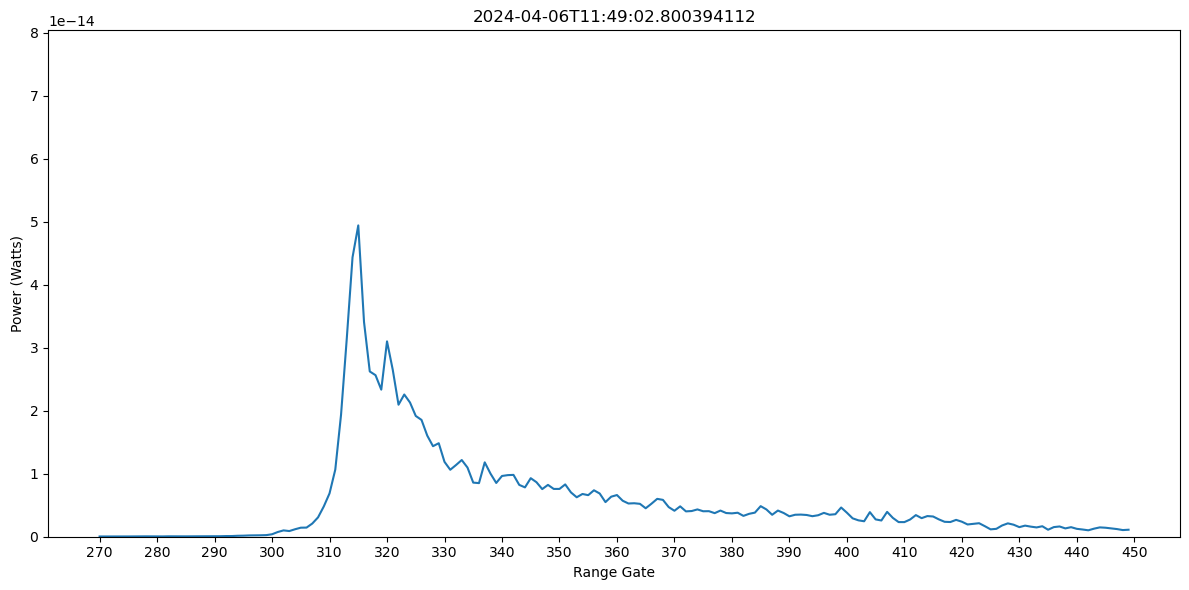

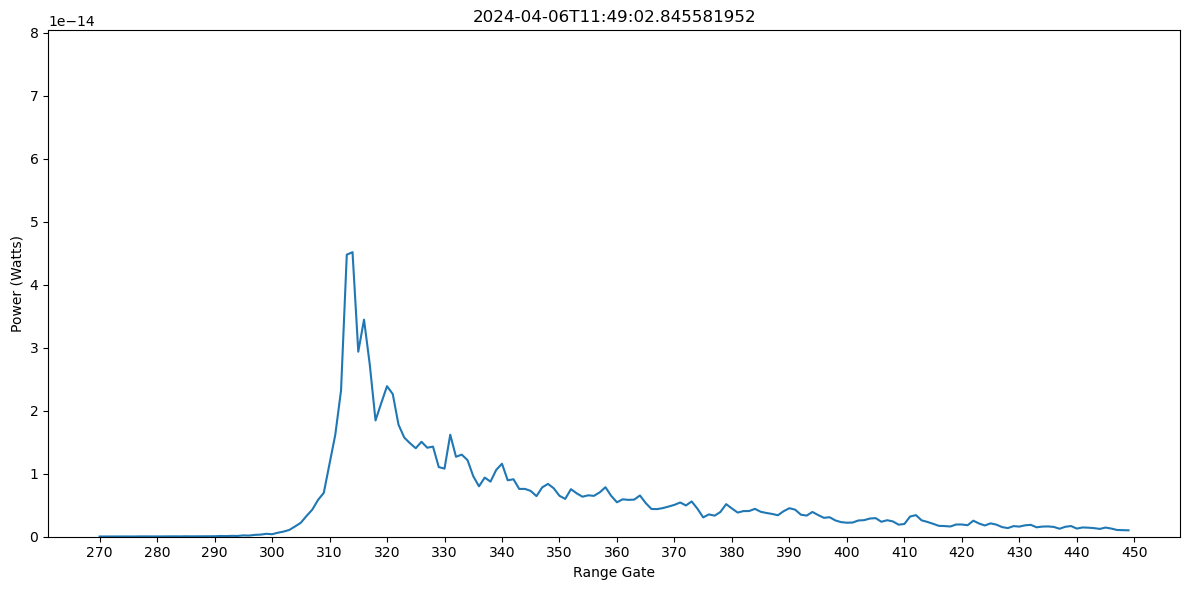

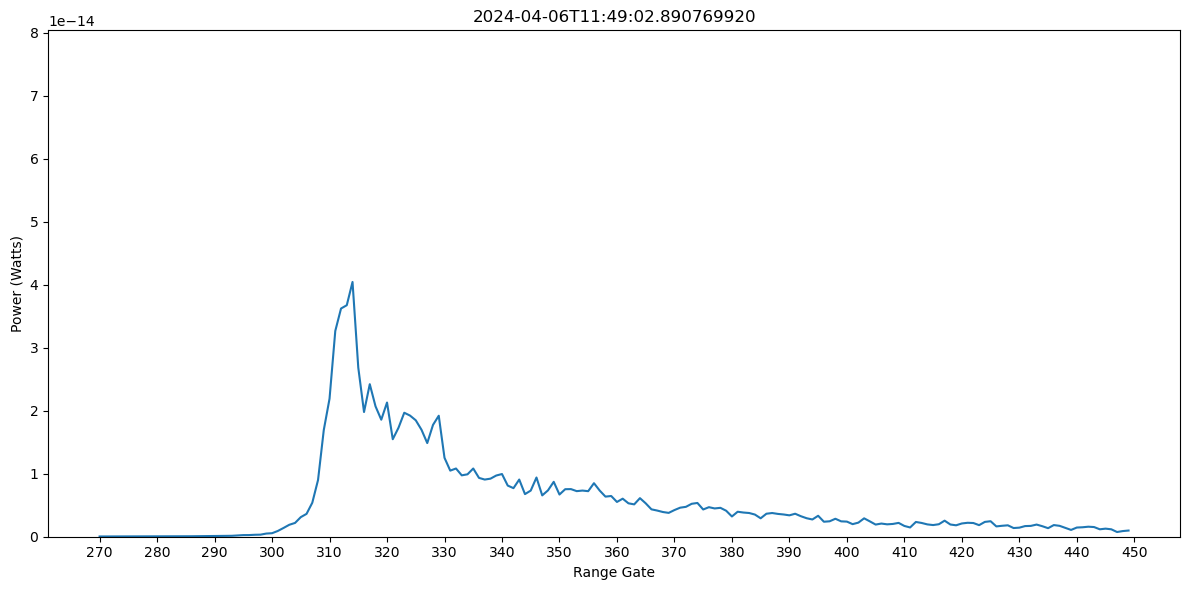

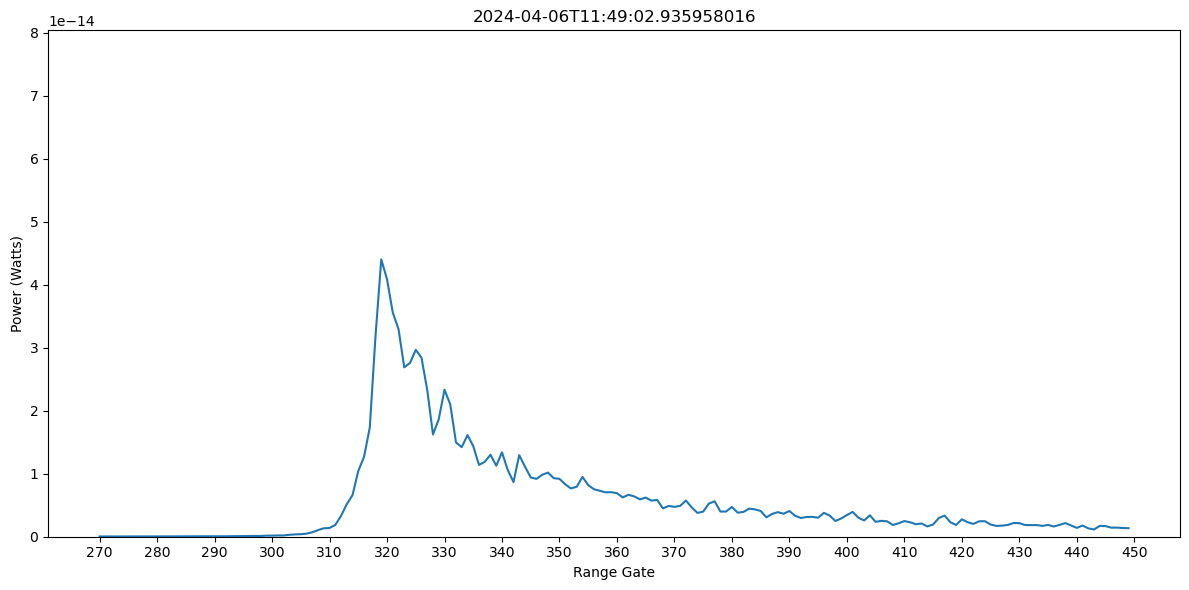

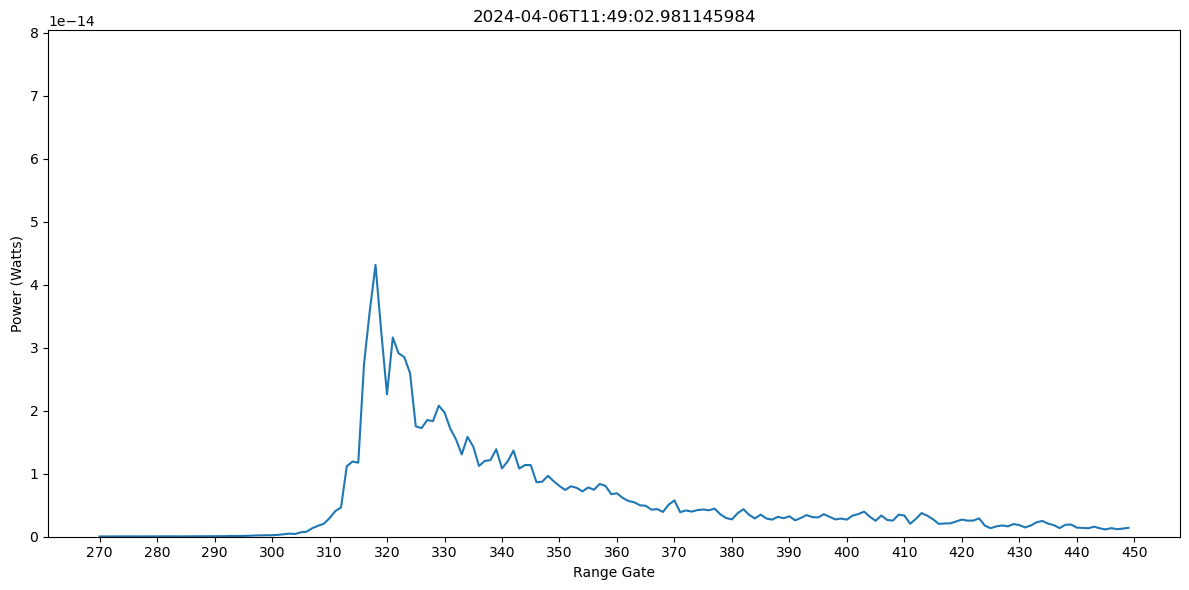

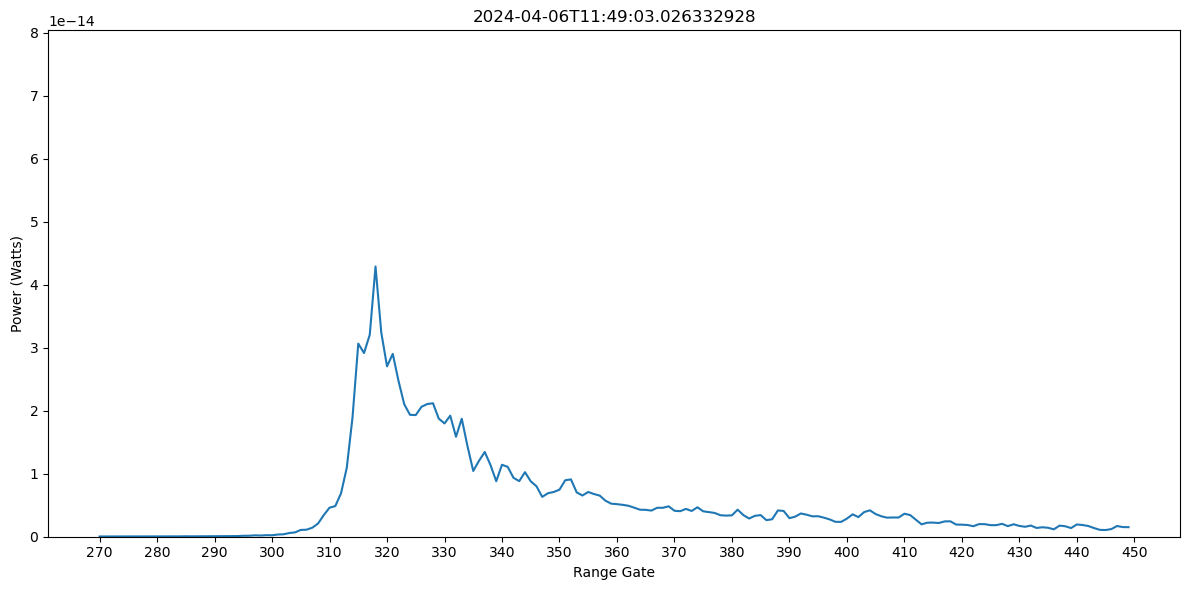

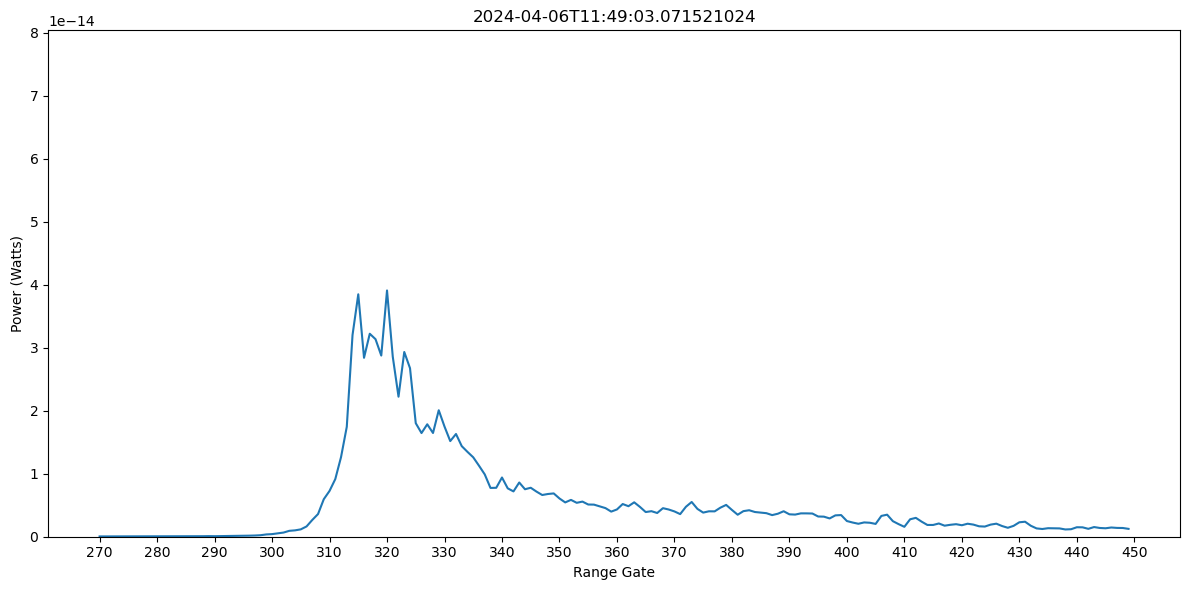

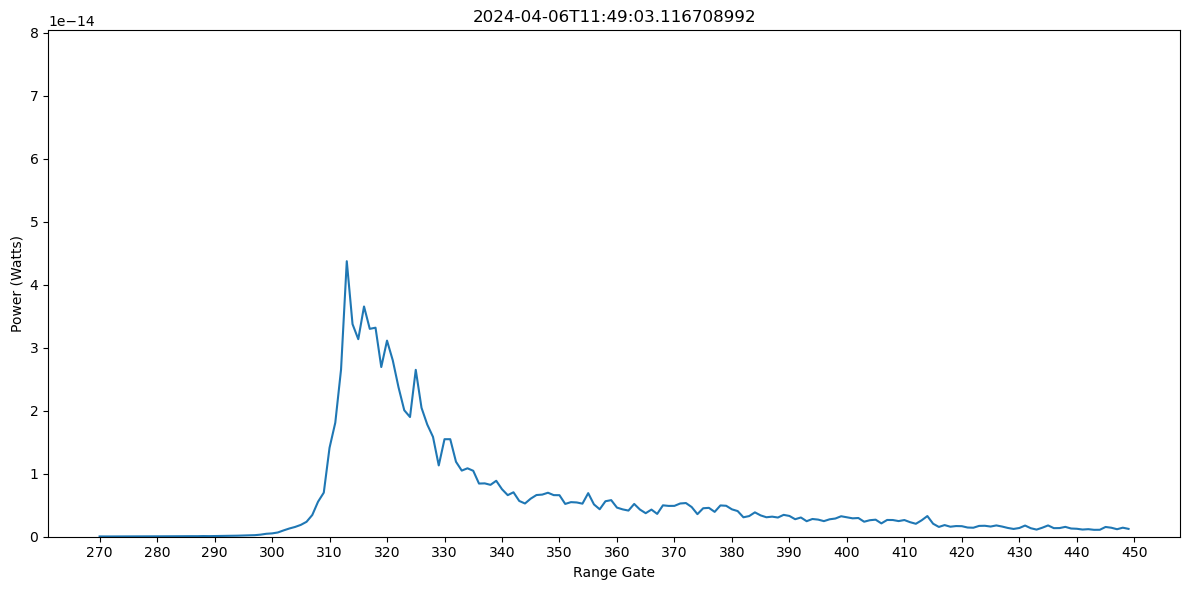

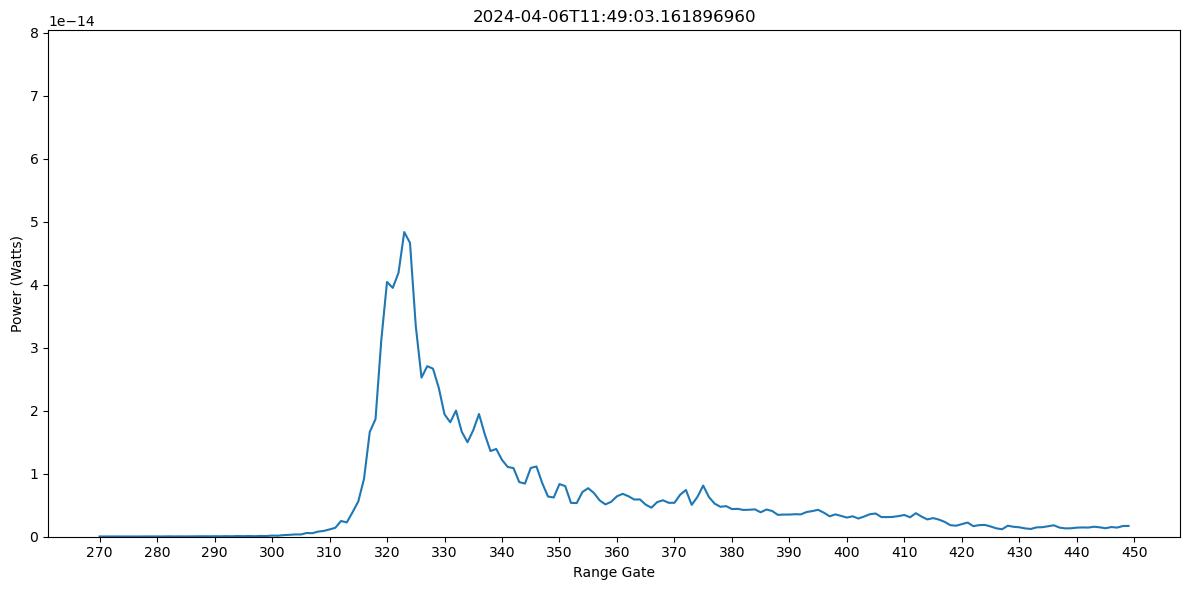

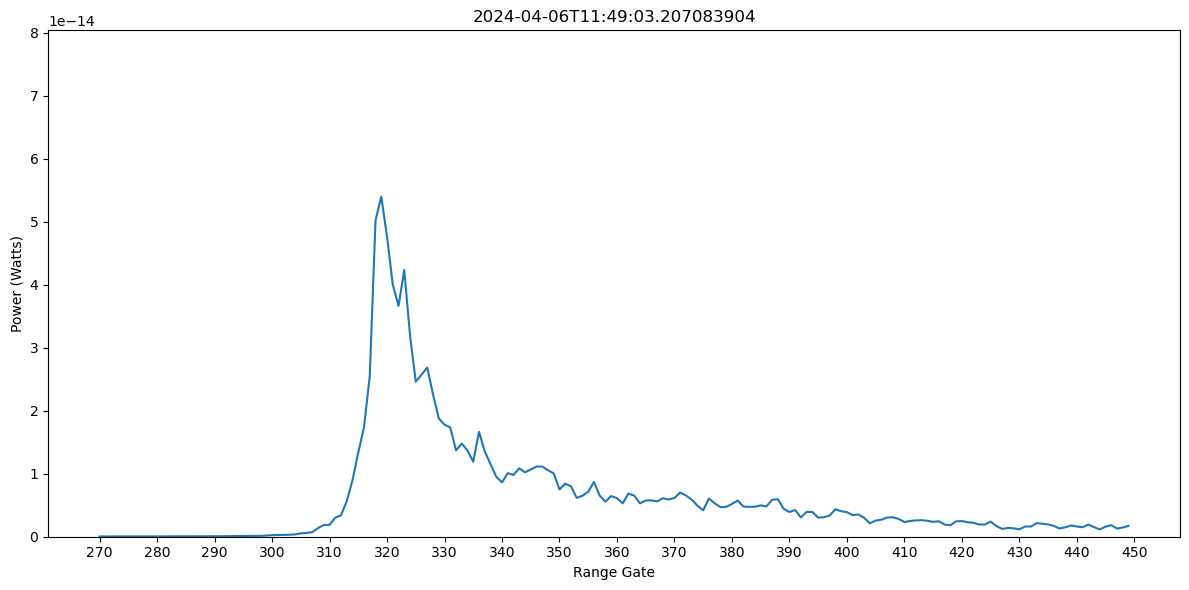

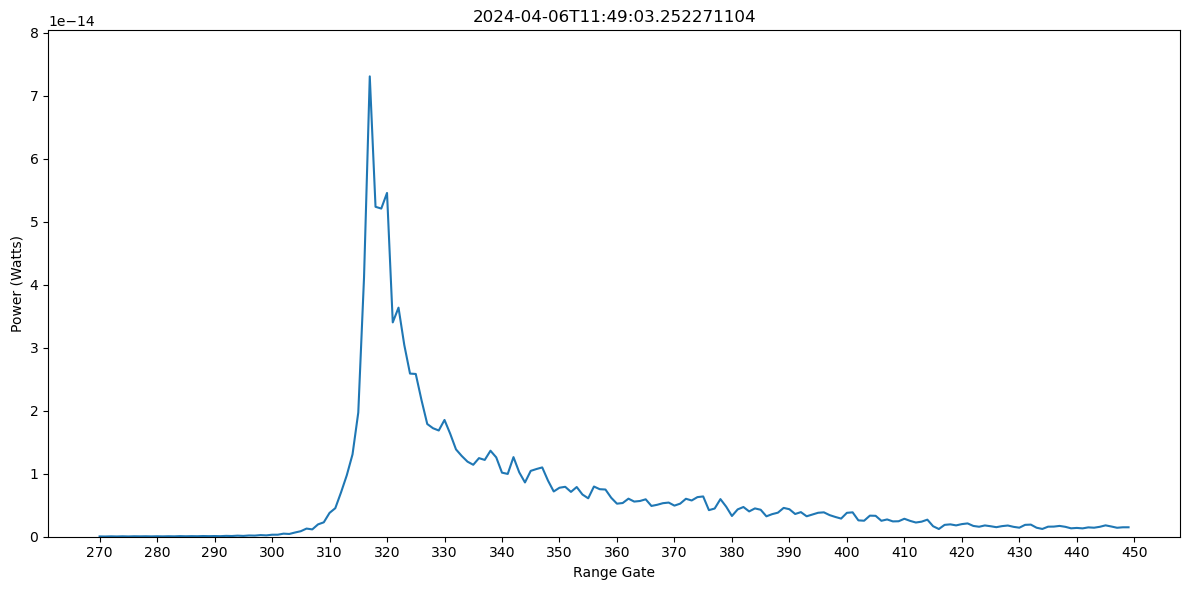

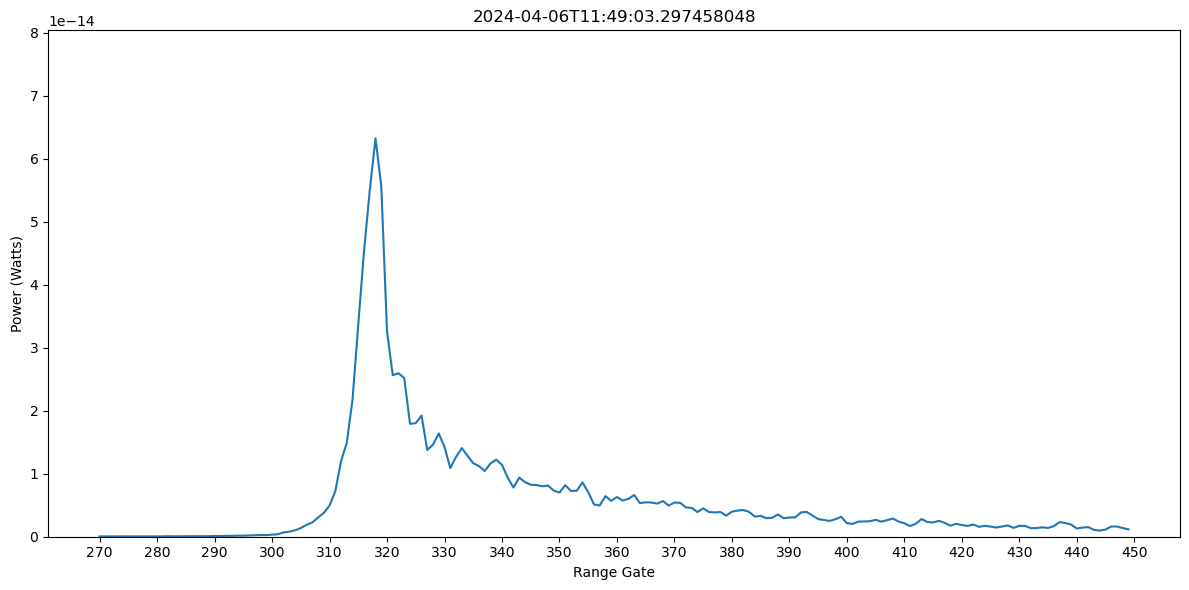

In [212]:
# Individual plots
n_to_plot = len(ds1_bbox.rec_count_20_ku)
# fig, axs = plt.subplots(n_to_plot, 2, figsize=(12, 2.5 * n_to_plot), sharex=True, sharey=True)

# Plot each waveform pair
for i in range(n_to_plot):
    # axs[i, 0] = plot_wfm(ds1_bbox, i, bin_start=270, bin_end=450) #.plot_wfm(ns, waveforms1[i], color="blue")
    axs[i, 1] = plot_wfm(ds1_bbox, i, bin_start=270, bin_end=450)
    # axs[i, 1] = plot_wfm(ds2_bbox, i, bin_start=270, bin_end=450)
    # axs[i, 1] = plot_wfm(ds2_bbox, i, bin_start=230, bin_end=410) # Thin case 20240522
    plt.savefig(f"wfm_fig{i}.png")
#     axs[i, 0].set_ylabel("Power")
#     axs[i, 0].set_title(f"Lat {lats1[i]:.4f}, Lon {lons1[i]:.4f}")
#     axs[i, 1].set_title(f"Lat {lats2[i]:.4f}, Lon {lons2[i]:.4f}")

# # Label x-axis of bottom row
# for ax in axs[-1, :]:
#     ax.set_xlabel("ns_20_ku (Bin Index)")

# # Add column titles
# fig.text(0.26, 0.95, "20240406", fontsize=14, fontweight='bold', ha='center')
# fig.text(0.74, 0.95, "20240519", fontsize=14, fontweight='bold', ha='center')

# plt.tight_layout(rect=[0, 0, 1, 0.93])  # leave space for top text
# plt.savefig("thick.pdf")
# plt.show()

In [10]:
plt.close('all')

### July 25, 2025 Get waveform power


In [40]:
def get_wfm_stat(ds, bin_start=0, bin_end=1024):
    waveforms = ds.variables['pwr_waveform_20_ku'][:]  # Power waveforms for 20 Hz
    echo_scale_pwr = ds.variables['echo_scale_pwr_20_ku'][:]  # Scaling factor for power
    echo_scale_factor = ds.variables['echo_scale_factor_20_ku'][:]  # Scaling factor exponent
    latitudes = ds.variables['lat_20_ku'][:]  # Latitude (20 Hz)
    longitudes = ds.variables['lon_20_ku'][:]  # Longitude (20 Hz)
    time = ds.variables['time_20_ku'][:]  # Ti

# Apply scaling to convert waveforms to power in watts
# scaled_waveforms = waveforms * echo_scale_factor[:, None] * (2.0 ** echo_scale_pwr[:, None])
    scaled_waveform = waveforms * echo_scale_factor * (2.0 ** echo_scale_pwr)
    # print(scaled_waveform[1, bin_start:bin_end].max())

    n_to_plot = len(ds.rec_count_20_ku)
    
    indices = range(len(ds.rec_count_20_ku))

    records = []

    for idx in indices:
        wf = scaled_waveform[idx, bin_start:bin_end]
        max_val = wf.max()
        # max_bin = bin_start + np.argmax(scaled_waveform[idx, bin_start:bin_end])
        mean_val = np.mean(wf)
        std_val = np.std(wf)

            
        records.append({
            # 'index': idx,
            'latitude': latitudes[idx].values,
            'longitude': longitudes[idx].values,
            'time': time[idx].values,
            'max_value': max_val.values,
            # 'max_bin': max_bin
            # 'mean_value': mean_val.values,
            # 'std_value': std_val.values
        })

    df = pd.DataFrame.from_records(records)
    return df

In [41]:
ds1_bbox.time_20_ku

<xarray.DataArray 'time_20_ku' (time_20_ku: 34)>
array(['2024-04-06T11:49:01.806257920', '2024-04-06T11:49:01.851446016',
       '2024-04-06T11:49:01.896633984', '2024-04-06T11:49:01.941822080',
       '2024-04-06T11:49:01.987010048', '2024-04-06T11:49:02.032198016',
       '2024-04-06T11:49:02.077385984', '2024-04-06T11:49:02.122573952',
       '2024-04-06T11:49:02.167762048', '2024-04-06T11:49:02.212950016',
       '2024-04-06T11:49:02.258137984', '2024-04-06T11:49:02.303325952',
       '2024-04-06T11:49:02.348513920', '2024-04-06T11:49:02.393702016',
       '2024-04-06T11:49:02.438889984', '2024-04-06T11:49:02.484078080',
       '2024-04-06T11:49:02.529266048', '2024-04-06T11:49:02.574453888',
       '2024-04-06T11:49:02.619641984', '2024-04-06T11:49:02.664829952',
       '2024-04-06T11:49:02.710018048', '2024-04-06T11:49:02.755206016',
       '2024-04-06T11:49:02.800394112', '2024-04-06T11:49:02.845581952',
       '2024-04-06T11:49:02.890769920', '2024-04-06T11:49:02.935958016',
       '2024-04-06T11:49:02.981145984', '2024-04-06T11:49:03.026332928',
       '2024-04-06T11:49:03.071521024', '2024-04-06T11:49:03.116708992',
       '2024-04-06T11:49:03.161896960', '2024-04-06T11:49:03.207083904',
       '2024-04-06T11:49:03.252271104', '2024-04-06T11:49:03.297458048'],
      dtype='datetime64[ns]')
Coordinates:
    lat_20_ku   (time_20_ku) float64 80.15 80.15 80.14 ... 80.07 80.06 80.06
    lon_20_ku   (time_20_ku) float64 -97.05 -97.05 -97.06 ... -97.16 -97.16
  * time_20_ku  (time_20_ku) datetime64[ns] 2024-04-06T11:49:01.806257920 ......
Attributes:
    comment:        TAI time counted in seconds since 2000-01-01 00:00:00. Ti...
    long_name:      time in TAI: seconds since 1 Jan 2000
    standard_name:  time

In [42]:
stat_0406 = get_wfm_stat(ds1_bbox)
stat_0406.to_csv('cs2_stat_0406.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'cs2_stat_0406.csv'

In [ ]:
stat_0519 = get_wfm_stat(ds2_bbox)
stat_0519.to_csv('cs2_stat_0519.csv', index=False)

In [44]:
stat_0411 = get_wfm_stat(ds1_bbox)
stat_0411.to_csv('cs2_stat_0411.csv', index=False)

In [45]:
stat_0522 = get_wfm_stat(ds2_bbox)
stat_0522.to_csv('cs2_stat_0522.csv', index=False)